# Titration curve drawer

## strong acid and strong base

Here we use the titration of 25 ml 0.1 M HCl with 0.1 M NaOH as an example to draw the titration curve.

**Proton Balance Equation (PBE) based calculation**

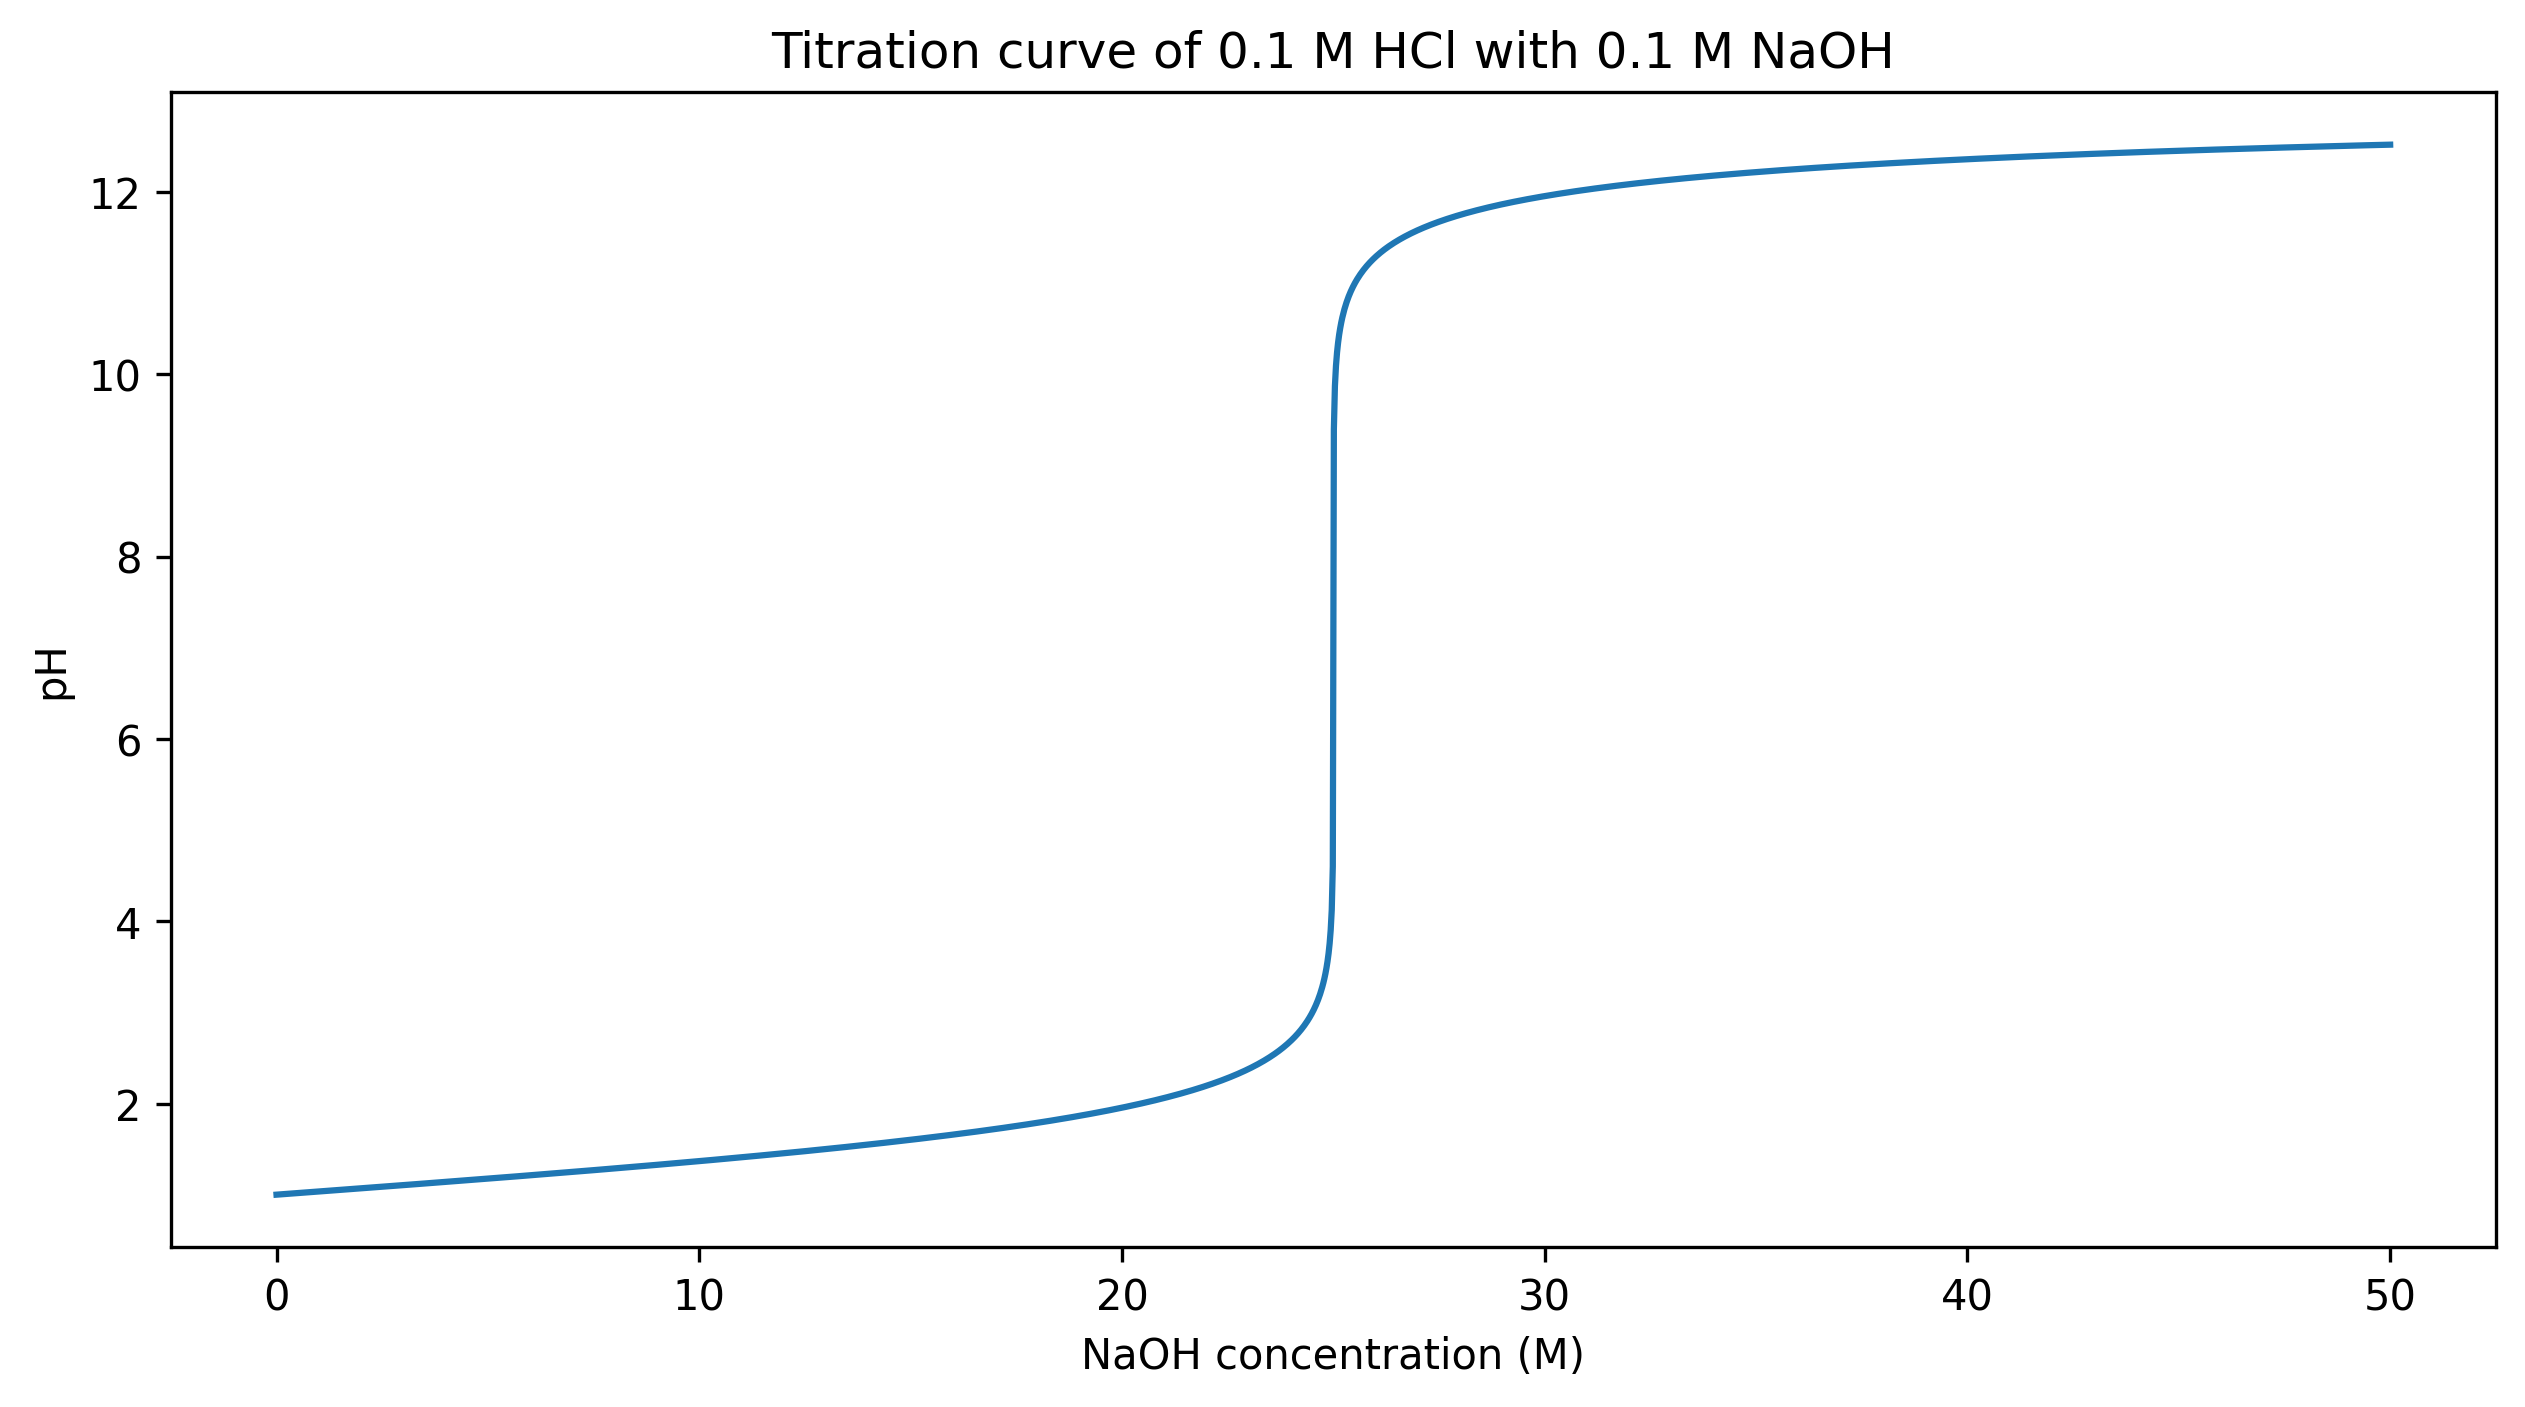

In [1]:
from phcal import *
import numpy as np
import matplotlib.pyplot as plt

hcl_init_conc = 0.1
naoh_conc = 0.1

hcl_init_vol = 25

titration = np.linspace(0, 50, 2000)
conc_hcl = (hcl_init_vol * hcl_init_conc) / (hcl_init_vol + titration)
conc_naoh = titration * naoh_conc / (hcl_init_vol + titration)

pH = []

for i in range(len(titration)):
    HCl = PBE_Inert(proton=1, proton_ref=1, conc=conc_hcl[i])
    NaOH = PBE_Inert(proton=0, proton_ref=-1, conc=conc_naoh[i])
    s = PBE_calc(HCl, NaOH)
    s.pH_calc()
    pH.append(s.pH)

plt.figure(figsize=(10, 5), dpi=300)

plt.plot(titration, pH)
plt.xlabel('NaOH concentration (M)')
plt.ylabel('pH')

plt.title('Titration curve of 0.1 M HCl with 0.1 M NaOH')
plt.show()

**Charge Balance Equation (CBE) based calculation**

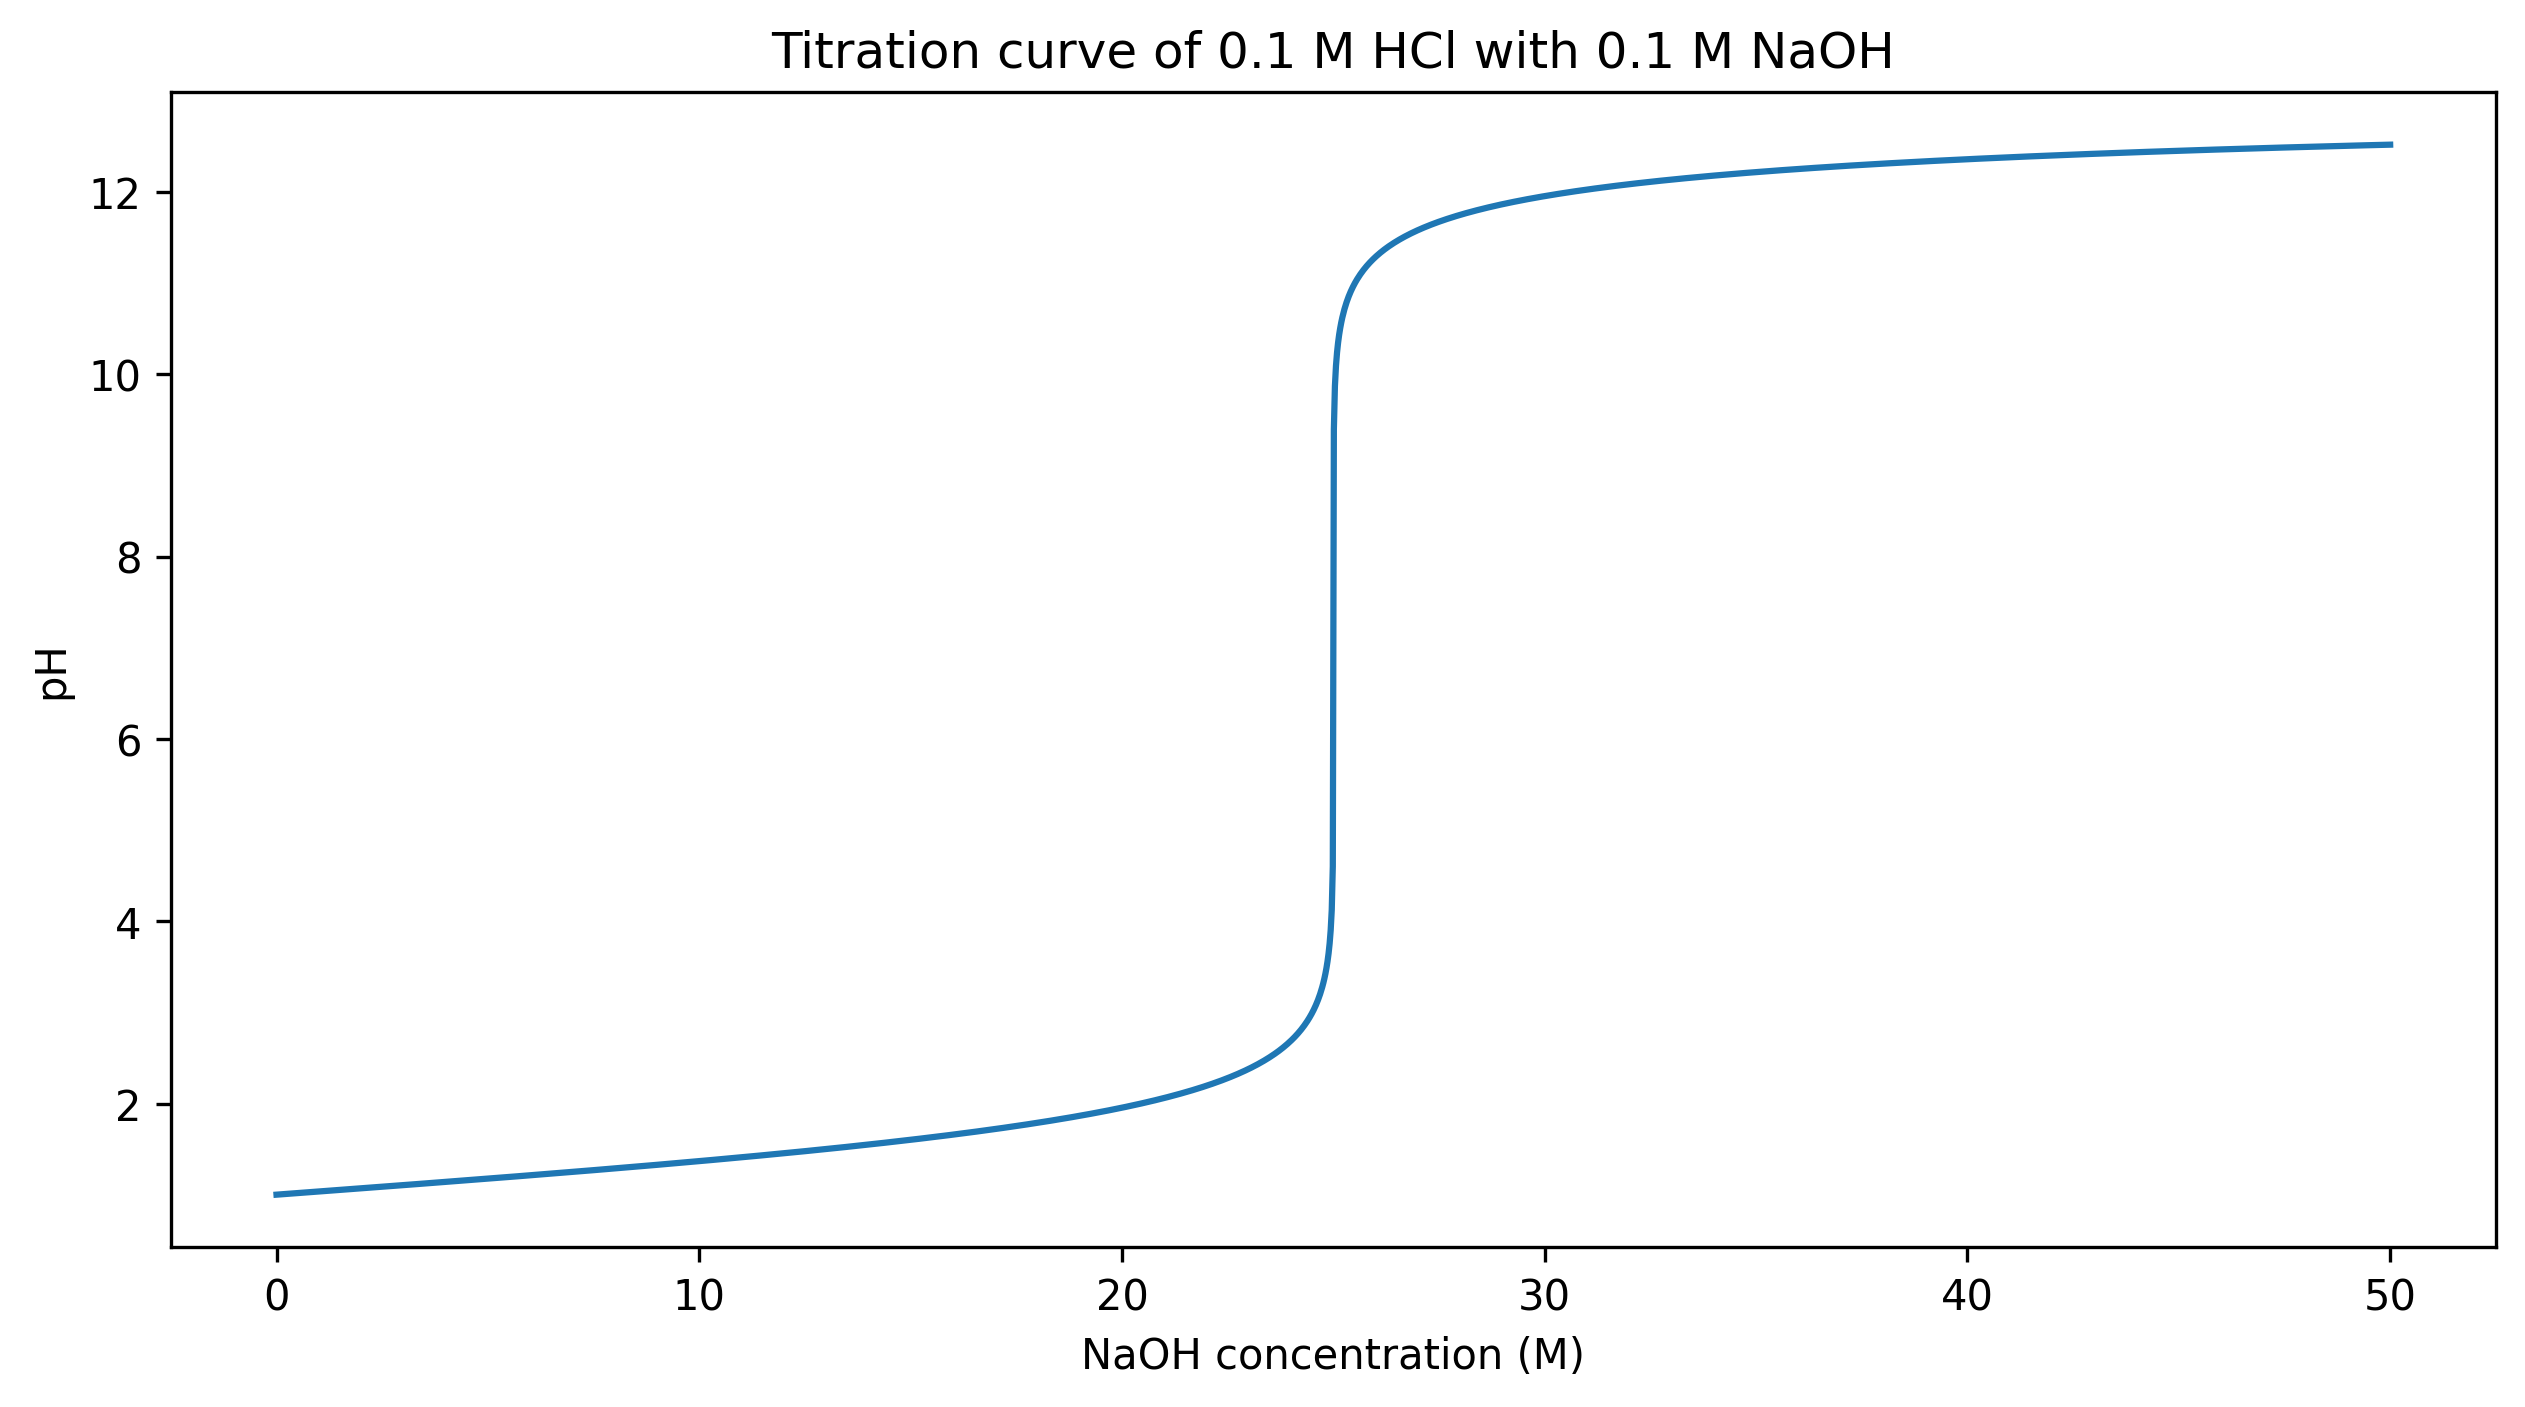

In [2]:
from phcal import *
import numpy as np
import matplotlib.pyplot as plt

hcl_init_conc = 0.1
naoh_conc = 0.1

hcl_init_vol = 25

titration = np.linspace(0, 50, 2000)
conc_hcl = (hcl_init_vol * hcl_init_conc) / (hcl_init_vol + titration)
conc_naoh = titration * naoh_conc / (hcl_init_vol + titration)

pH = []

for i in range(len(titration)):
    HCl = CBE_Inert(charge=-1, conc=conc_hcl[i])
    NaOH = CBE_Inert(charge=1, conc=conc_naoh[i])
    s = CBE_calc(HCl, NaOH)
    s.pH_calc()
    pH.append(s.pH)

plt.figure(figsize=(10, 5), dpi=300)

plt.plot(titration, pH)
plt.xlabel('NaOH concentration (M)')
plt.ylabel('pH')

plt.title('Titration curve of 0.1 M HCl with 0.1 M NaOH')
plt.show()

## weak acid and strong base

Here we use the titration of 25 ml 0.1 M MeCOOH (acetic acid) with 0.1 M NaOH as an example.

**Proton Balance Equation (PBE) based calculation**

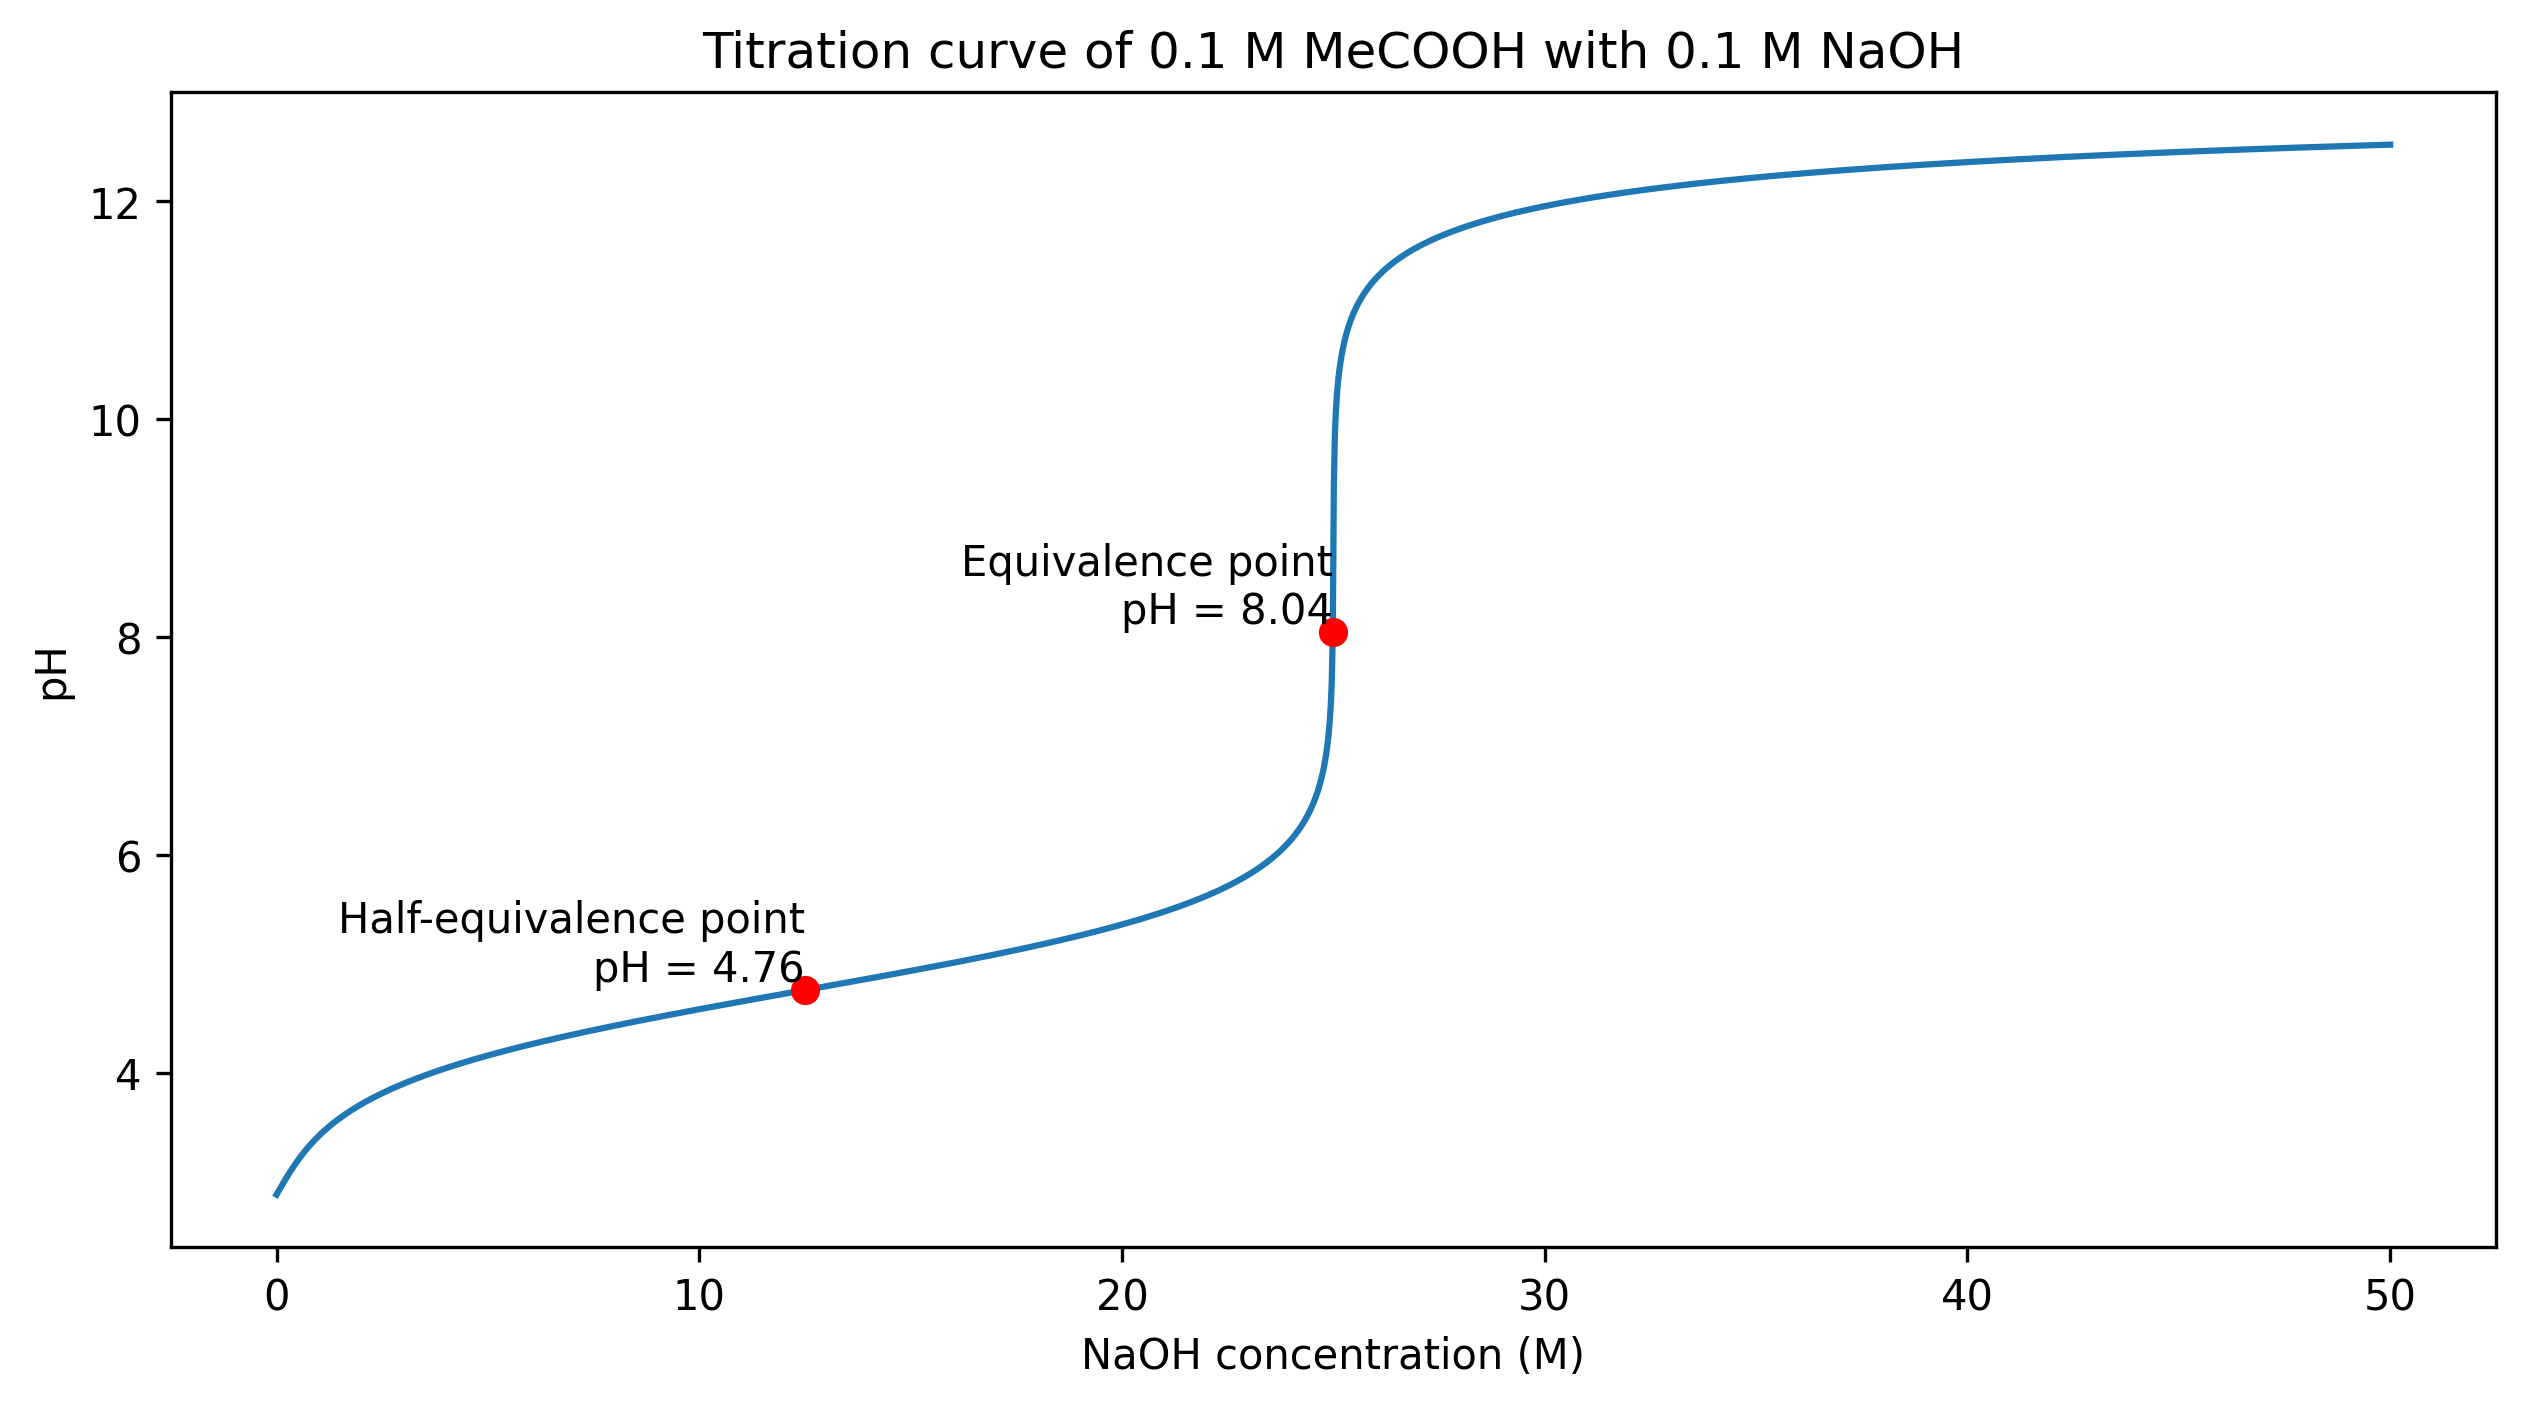

In [23]:
from phcal import *
import numpy as np
import matplotlib.pyplot as plt

Acid_init_conc = 0.1
naoh_conc = 0.1

Acid_init_vol = 25

titration = np.linspace(0, 50, 2000)
conc_Acid = (Acid_init_vol * Acid_init_conc) / (Acid_init_vol + titration)
conc_naoh = titration * naoh_conc / (Acid_init_vol + titration)

pH = []

for i in range(len(titration)):
    Acid = PBE_Acid(proton=1, proton_ref=1, pKa=4.76, conc=conc_Acid[i])
    NaOH = PBE_Inert(proton=0, proton_ref=-1, conc=conc_naoh[i])
    s = PBE_calc(Acid, NaOH)
    s.pH_calc()
    pH.append(s.pH)

plt.figure(figsize=(10, 5), dpi=300)

plt.plot(titration, pH)
plt.xlabel('NaOH concentration (M)')
plt.ylabel('pH')

# Mark the equivalence point and the half-equivalence point
equivalence_point = 25
half_equivalence_point = equivalence_point / 2
equivalence_pH = pH[np.argmin(np.abs(titration - equivalence_point))]
half_equivalence_pH = pH[np.argmin(np.abs(titration - half_equivalence_point))]

# Mark the equivalence point and the half-equivalence point
plt.plot(equivalence_point, equivalence_pH, 'ro')
plt.plot(half_equivalence_point, half_equivalence_pH, 'ro')

# Add text to the plot
plt.text(equivalence_point, equivalence_pH, f'Equivalence point\npH = {equivalence_pH:.2f}', verticalalignment='bottom', horizontalalignment='right')
plt.text(half_equivalence_point, half_equivalence_pH, f'Half-equivalence point\npH = {half_equivalence_pH:.2f}', verticalalignment='bottom', horizontalalignment='right')

plt.title('Titration curve of 0.1 M MeCOOH with 0.1 M NaOH')
plt.show()

**Charge Balance Equation (CBE) based calculation**

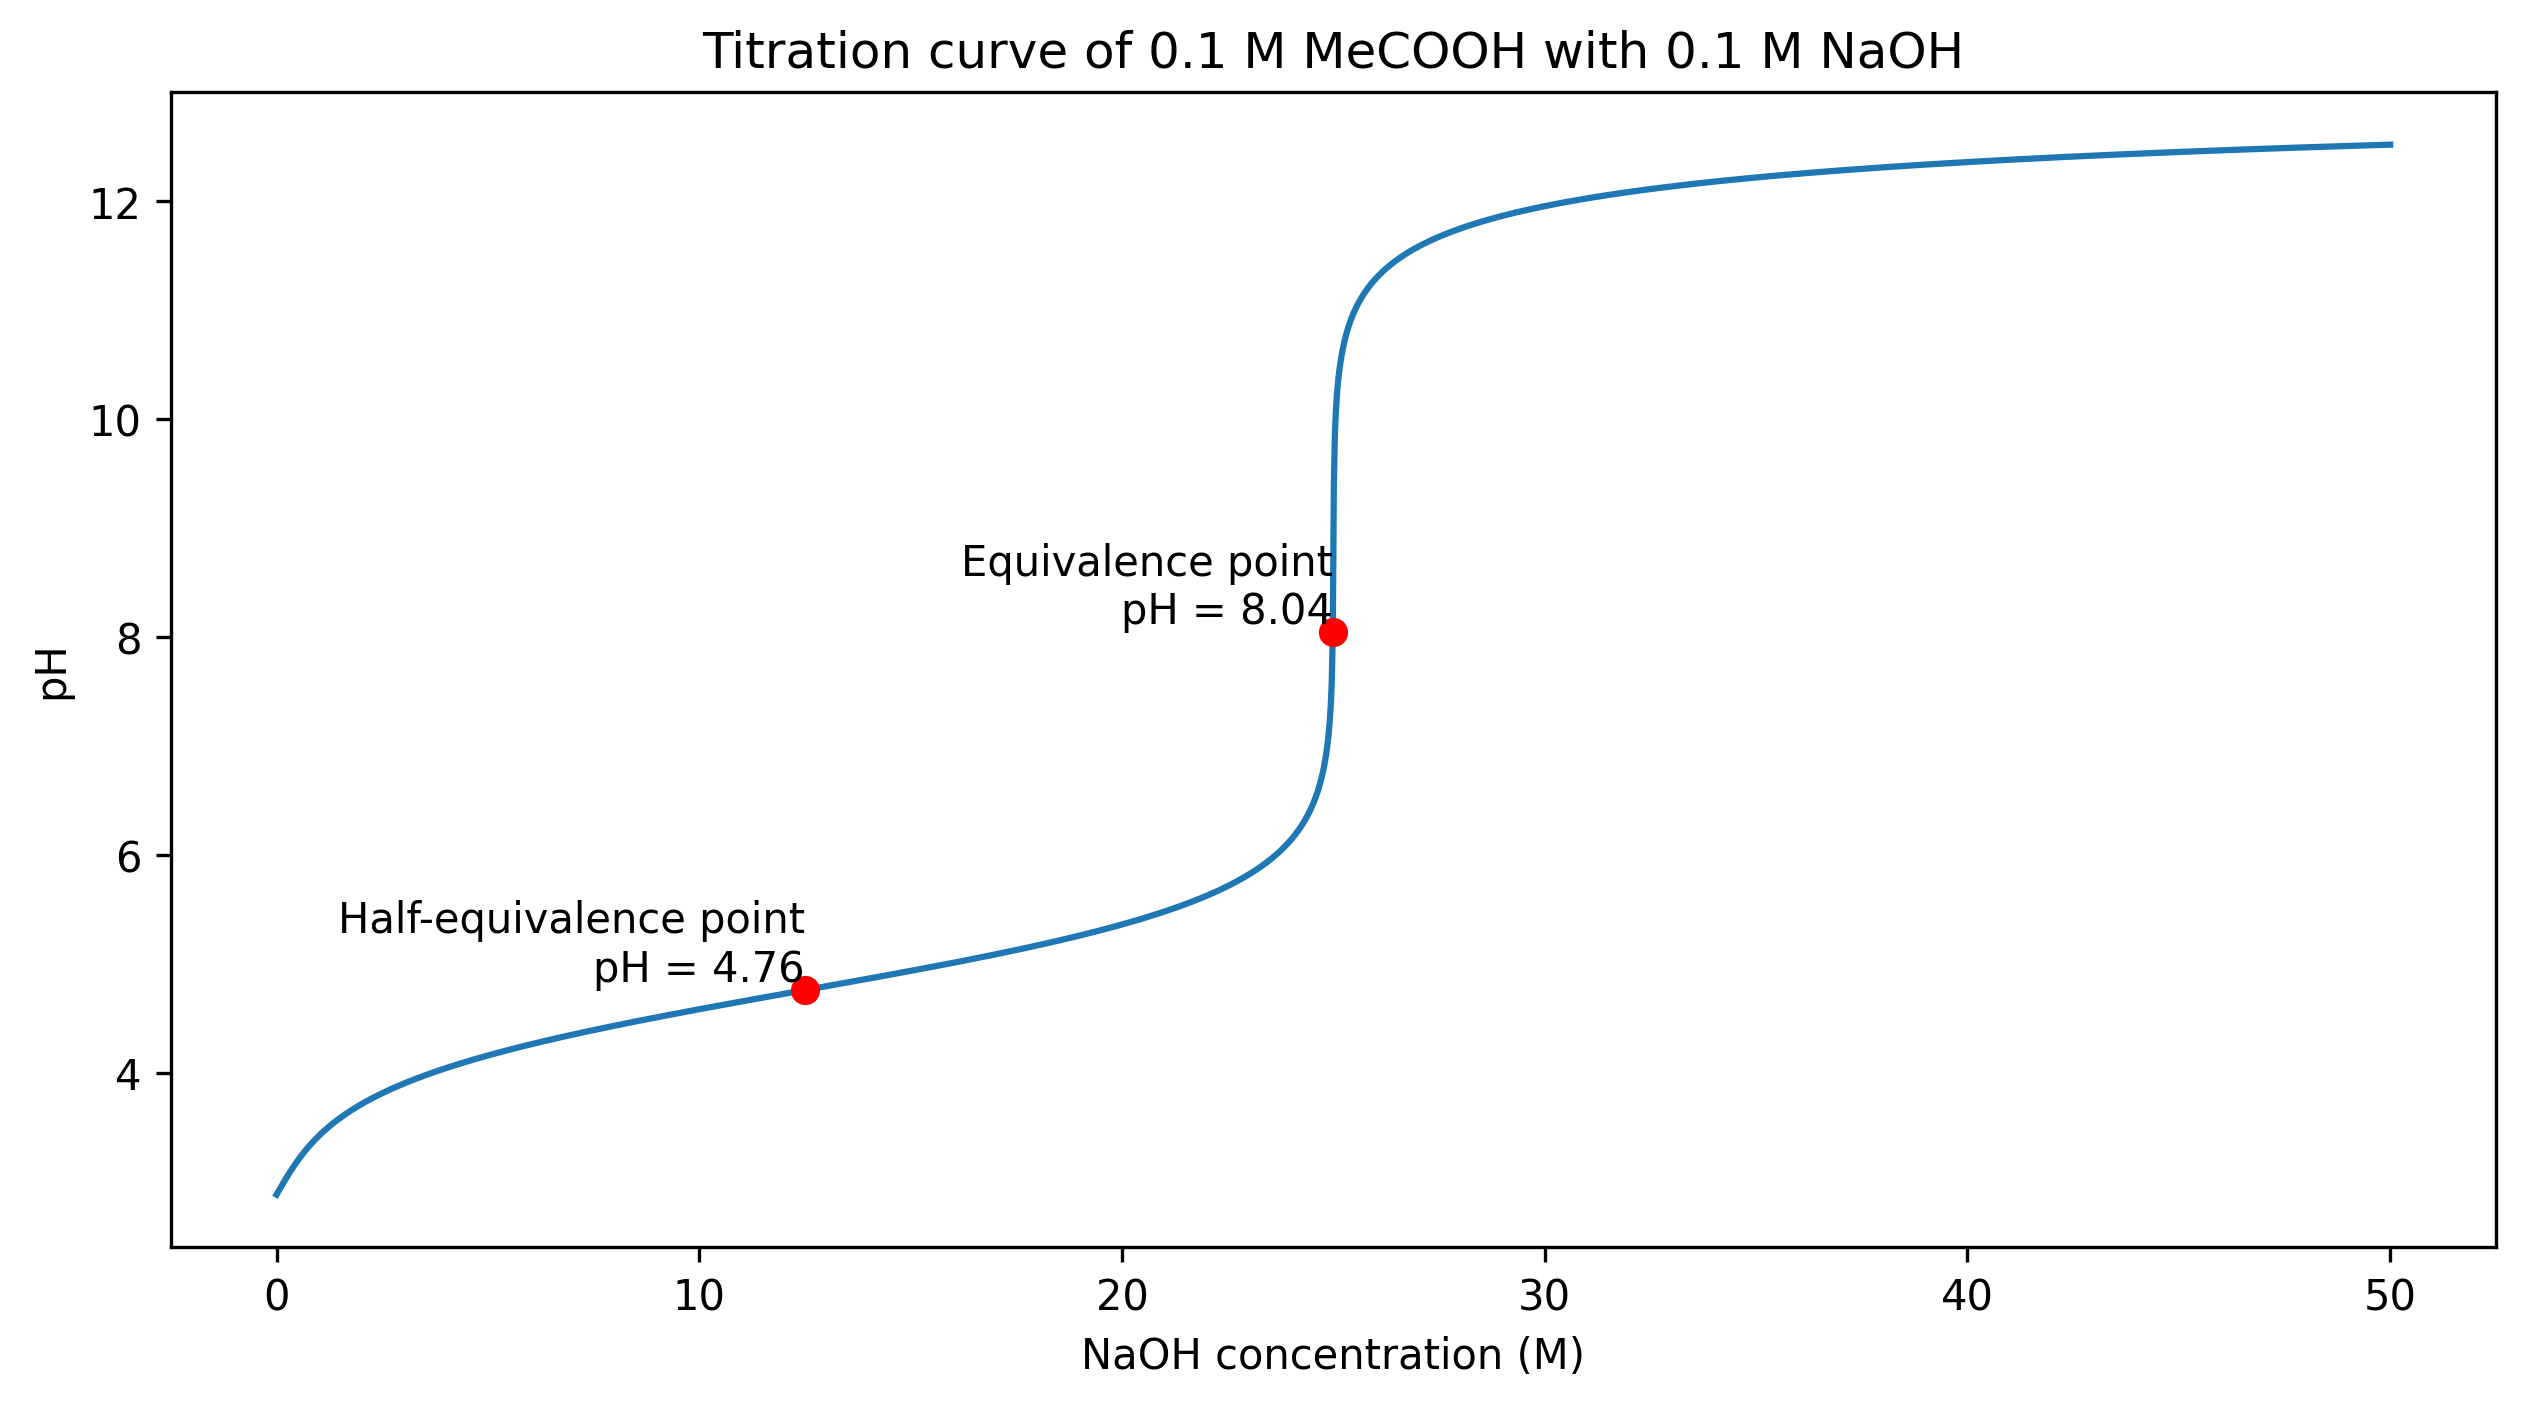

In [25]:
from phcal import *
import numpy as np
import matplotlib.pyplot as plt

Acid_init_conc = 0.1
naoh_conc = 0.1

Acid_init_vol = 25

titration = np.linspace(0, 50, 2000)
conc_Acid = (Acid_init_vol * Acid_init_conc) / (Acid_init_vol + titration)
conc_naoh = titration * naoh_conc / (Acid_init_vol + titration)

pH = []

for i in range(len(titration)):
    Acid = CBE_Acid(charge=0, pKa=4.76, conc=conc_Acid[i])
    NaOH = CBE_Inert(charge=1, conc=conc_naoh[i])
    s = CBE_calc(Acid, NaOH)
    s.pH_calc()
    pH.append(s.pH)

plt.figure(figsize=(10, 5), dpi=300)

plt.plot(titration, pH)
plt.xlabel('NaOH concentration (M)')
plt.ylabel('pH')

# Mark the equivalence point and the half-equivalence point
equivalence_point = 25
half_equivalence_point = equivalence_point / 2
equivalence_pH = pH[np.argmin(np.abs(titration - equivalence_point))]
half_equivalence_pH = pH[np.argmin(np.abs(titration - half_equivalence_point))]

# Mark the equivalence point and the half-equivalence point
plt.plot(equivalence_point, equivalence_pH, 'ro')
plt.plot(half_equivalence_point, half_equivalence_pH, 'ro')

# Add text to the plot
plt.text(equivalence_point, equivalence_pH, f'Equivalence point\npH = {equivalence_pH:.2f}', verticalalignment='bottom', horizontalalignment='right')
plt.text(half_equivalence_point, half_equivalence_pH, f'Half-equivalence point\npH = {half_equivalence_pH:.2f}', verticalalignment='bottom', horizontalalignment='right')

plt.title('Titration curve of 0.1 M MeCOOH with 0.1 M NaOH')
plt.show()

## weak base and strong acid

Let's use the titration of 25 $\text{cm}^3$ 0.1 M $\text{NH}_3$ with 0.1 M HCl as an example.

**Proton Balance Equation (PBE) based calculation**

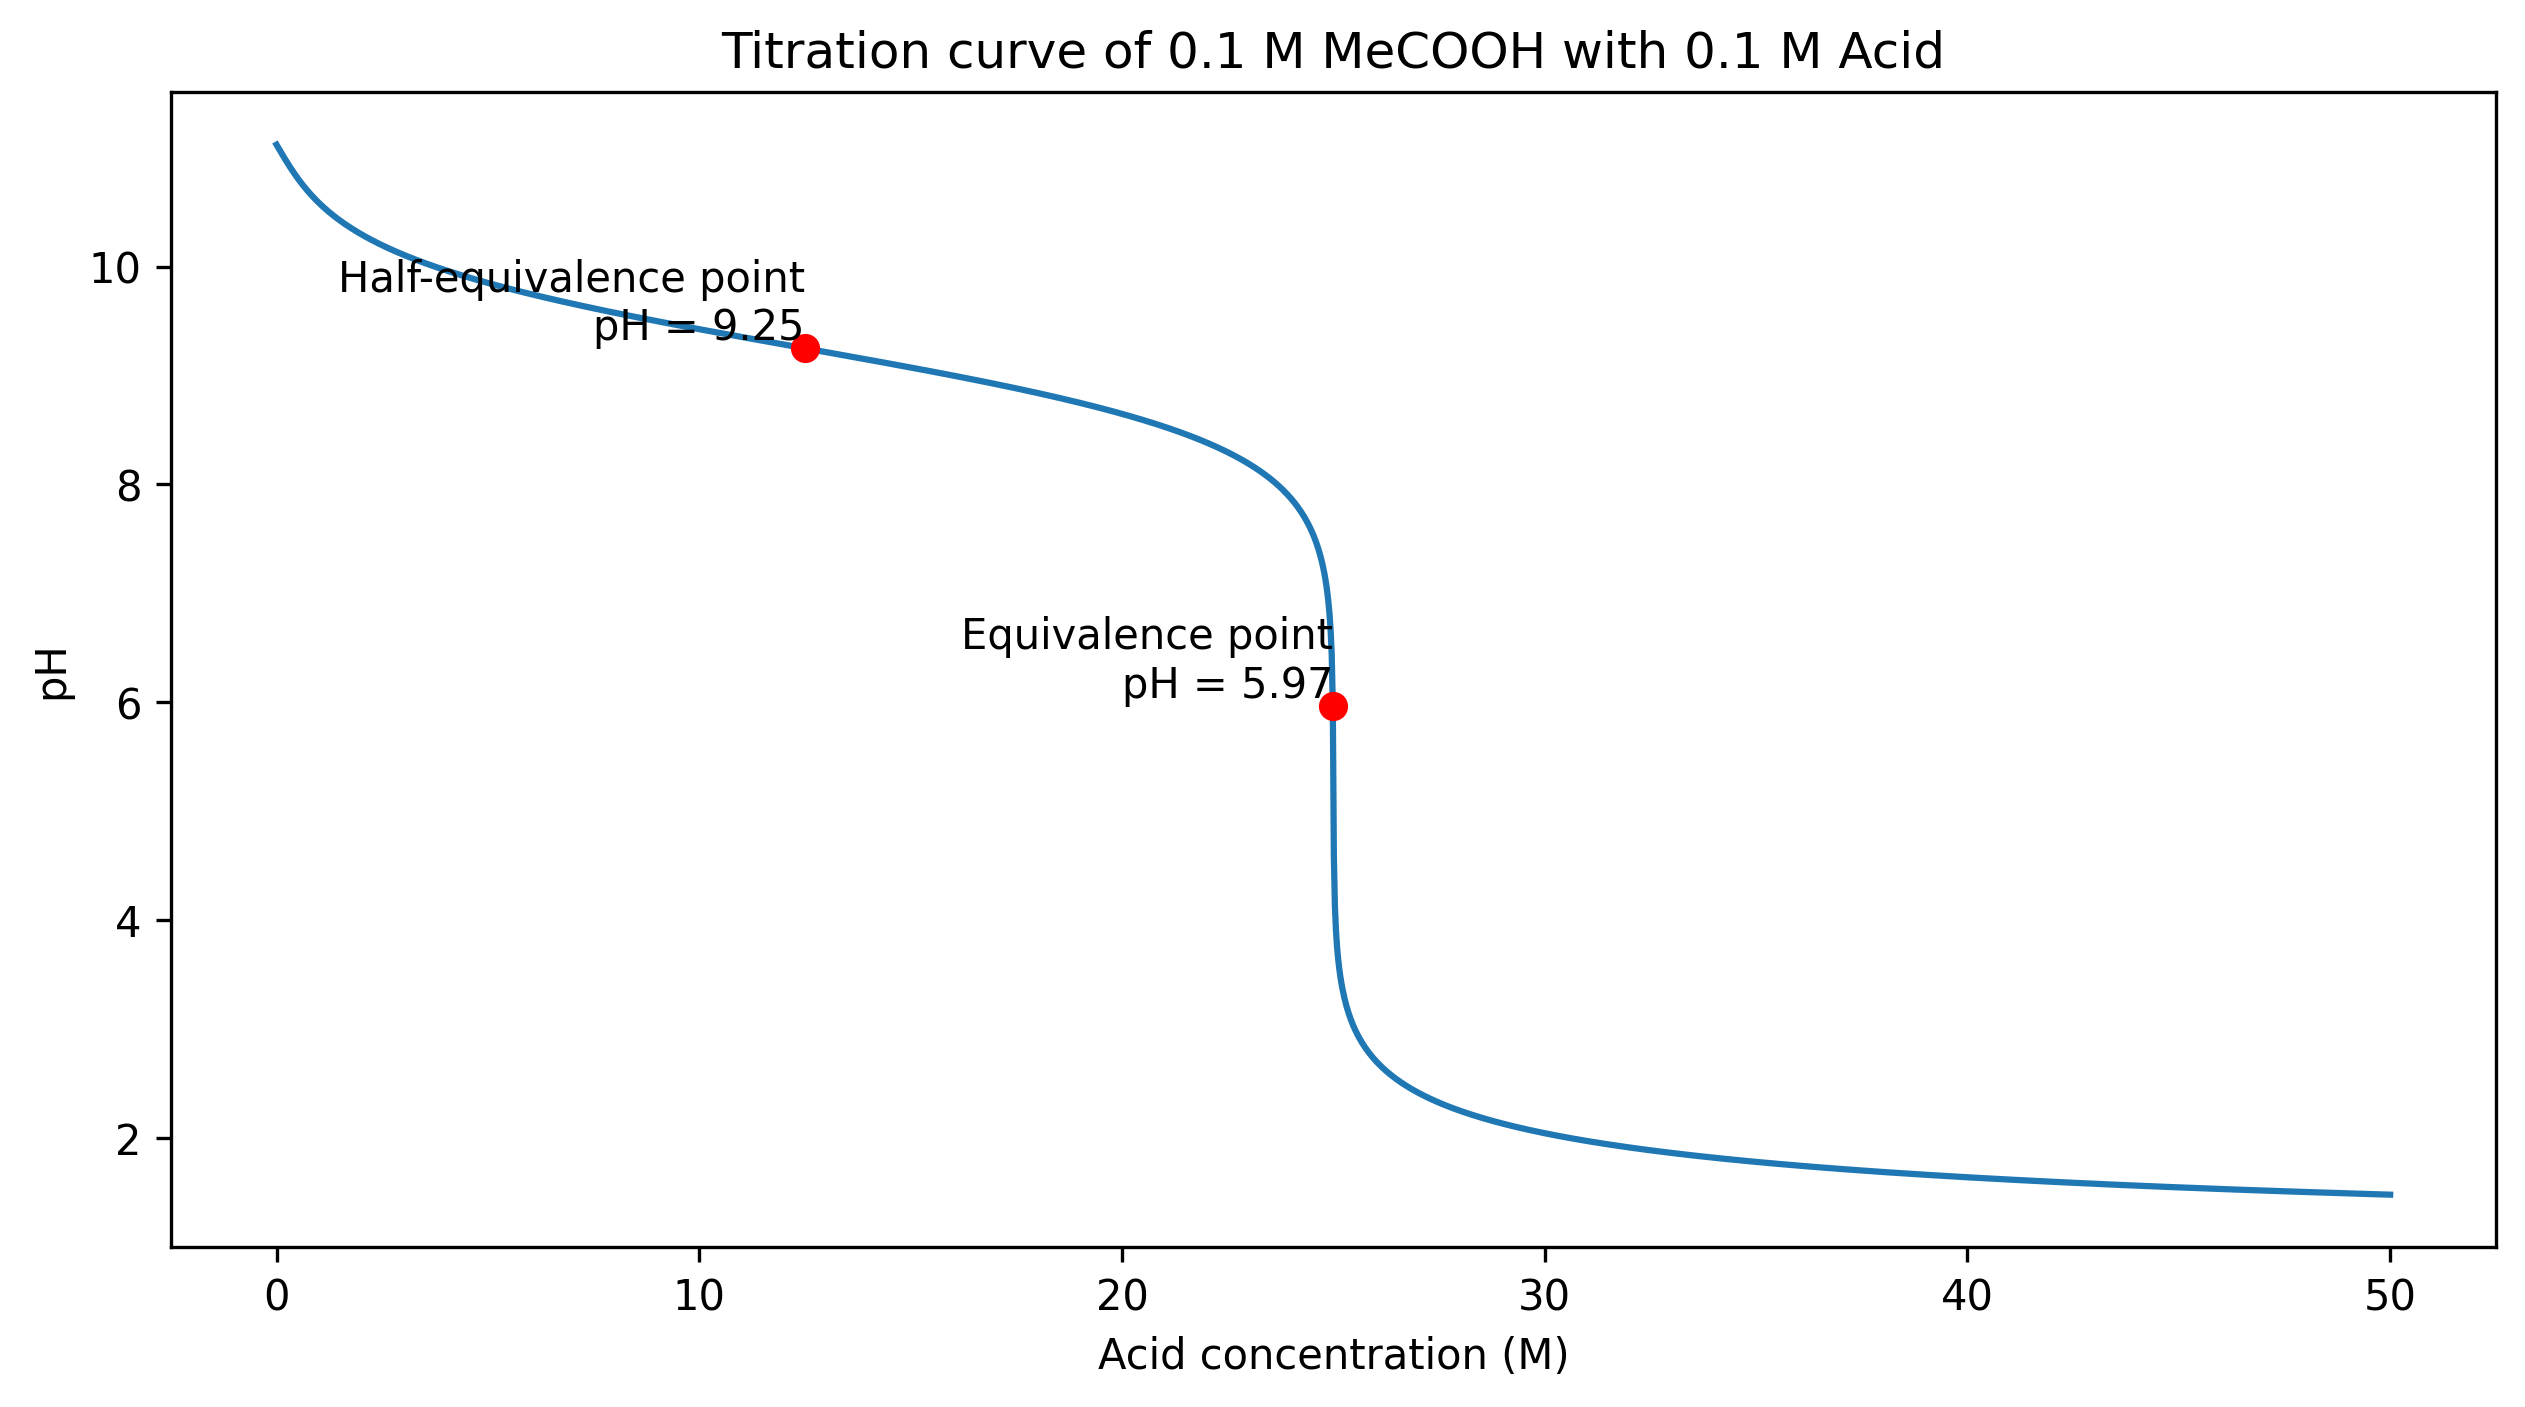

In [31]:
from phcal import *
import numpy as np
import matplotlib.pyplot as plt

Base_init_conc = 0.1
Acid_conc = 0.1

Base_init_vol = 25

titration = np.linspace(0, 50, 2000)
conc_Base_ = (Base_init_vol * Base_init_conc) / (Base_init_vol + titration)
conc_Acid = titration * Acid_conc / (Base_init_vol + titration)

pH = []

for i in range(len(titration)):
    Base_ = PBE_Acid(proton=1, proton_ref=0, pKa=9.25, conc=conc_Base_[i])
    Acid = PBE_Inert(proton=0, proton_ref=1, conc=conc_Acid[i])
    s = PBE_calc(Base_, Acid)
    s.pH_calc()
    pH.append(s.pH)

plt.figure(figsize=(10, 5), dpi=300)

plt.plot(titration, pH)
plt.xlabel('Acid concentration (M)')
plt.ylabel('pH')

# Mark the equivalence point and the half-equivalence point
equivalence_point = 25
half_equivalence_point = equivalence_point / 2
equivalence_pH = pH[np.argmin(np.abs(titration - equivalence_point))]
half_equivalence_pH = pH[np.argmin(np.abs(titration - half_equivalence_point))]

# Mark the equivalence point and the half-equivalence point
plt.plot(equivalence_point, equivalence_pH, 'ro')
plt.plot(half_equivalence_point, half_equivalence_pH, 'ro')

# Add text to the plot
plt.text(equivalence_point, equivalence_pH, f'Equivalence point\npH = {equivalence_pH:.2f}', verticalalignment='bottom', horizontalalignment='right')
plt.text(half_equivalence_point, half_equivalence_pH, f'Half-equivalence point\npH = {half_equivalence_pH:.2f}', verticalalignment='bottom', horizontalalignment='right')

plt.title('Titration curve of 0.1 M MeCOOH with 0.1 M Acid')
plt.show()

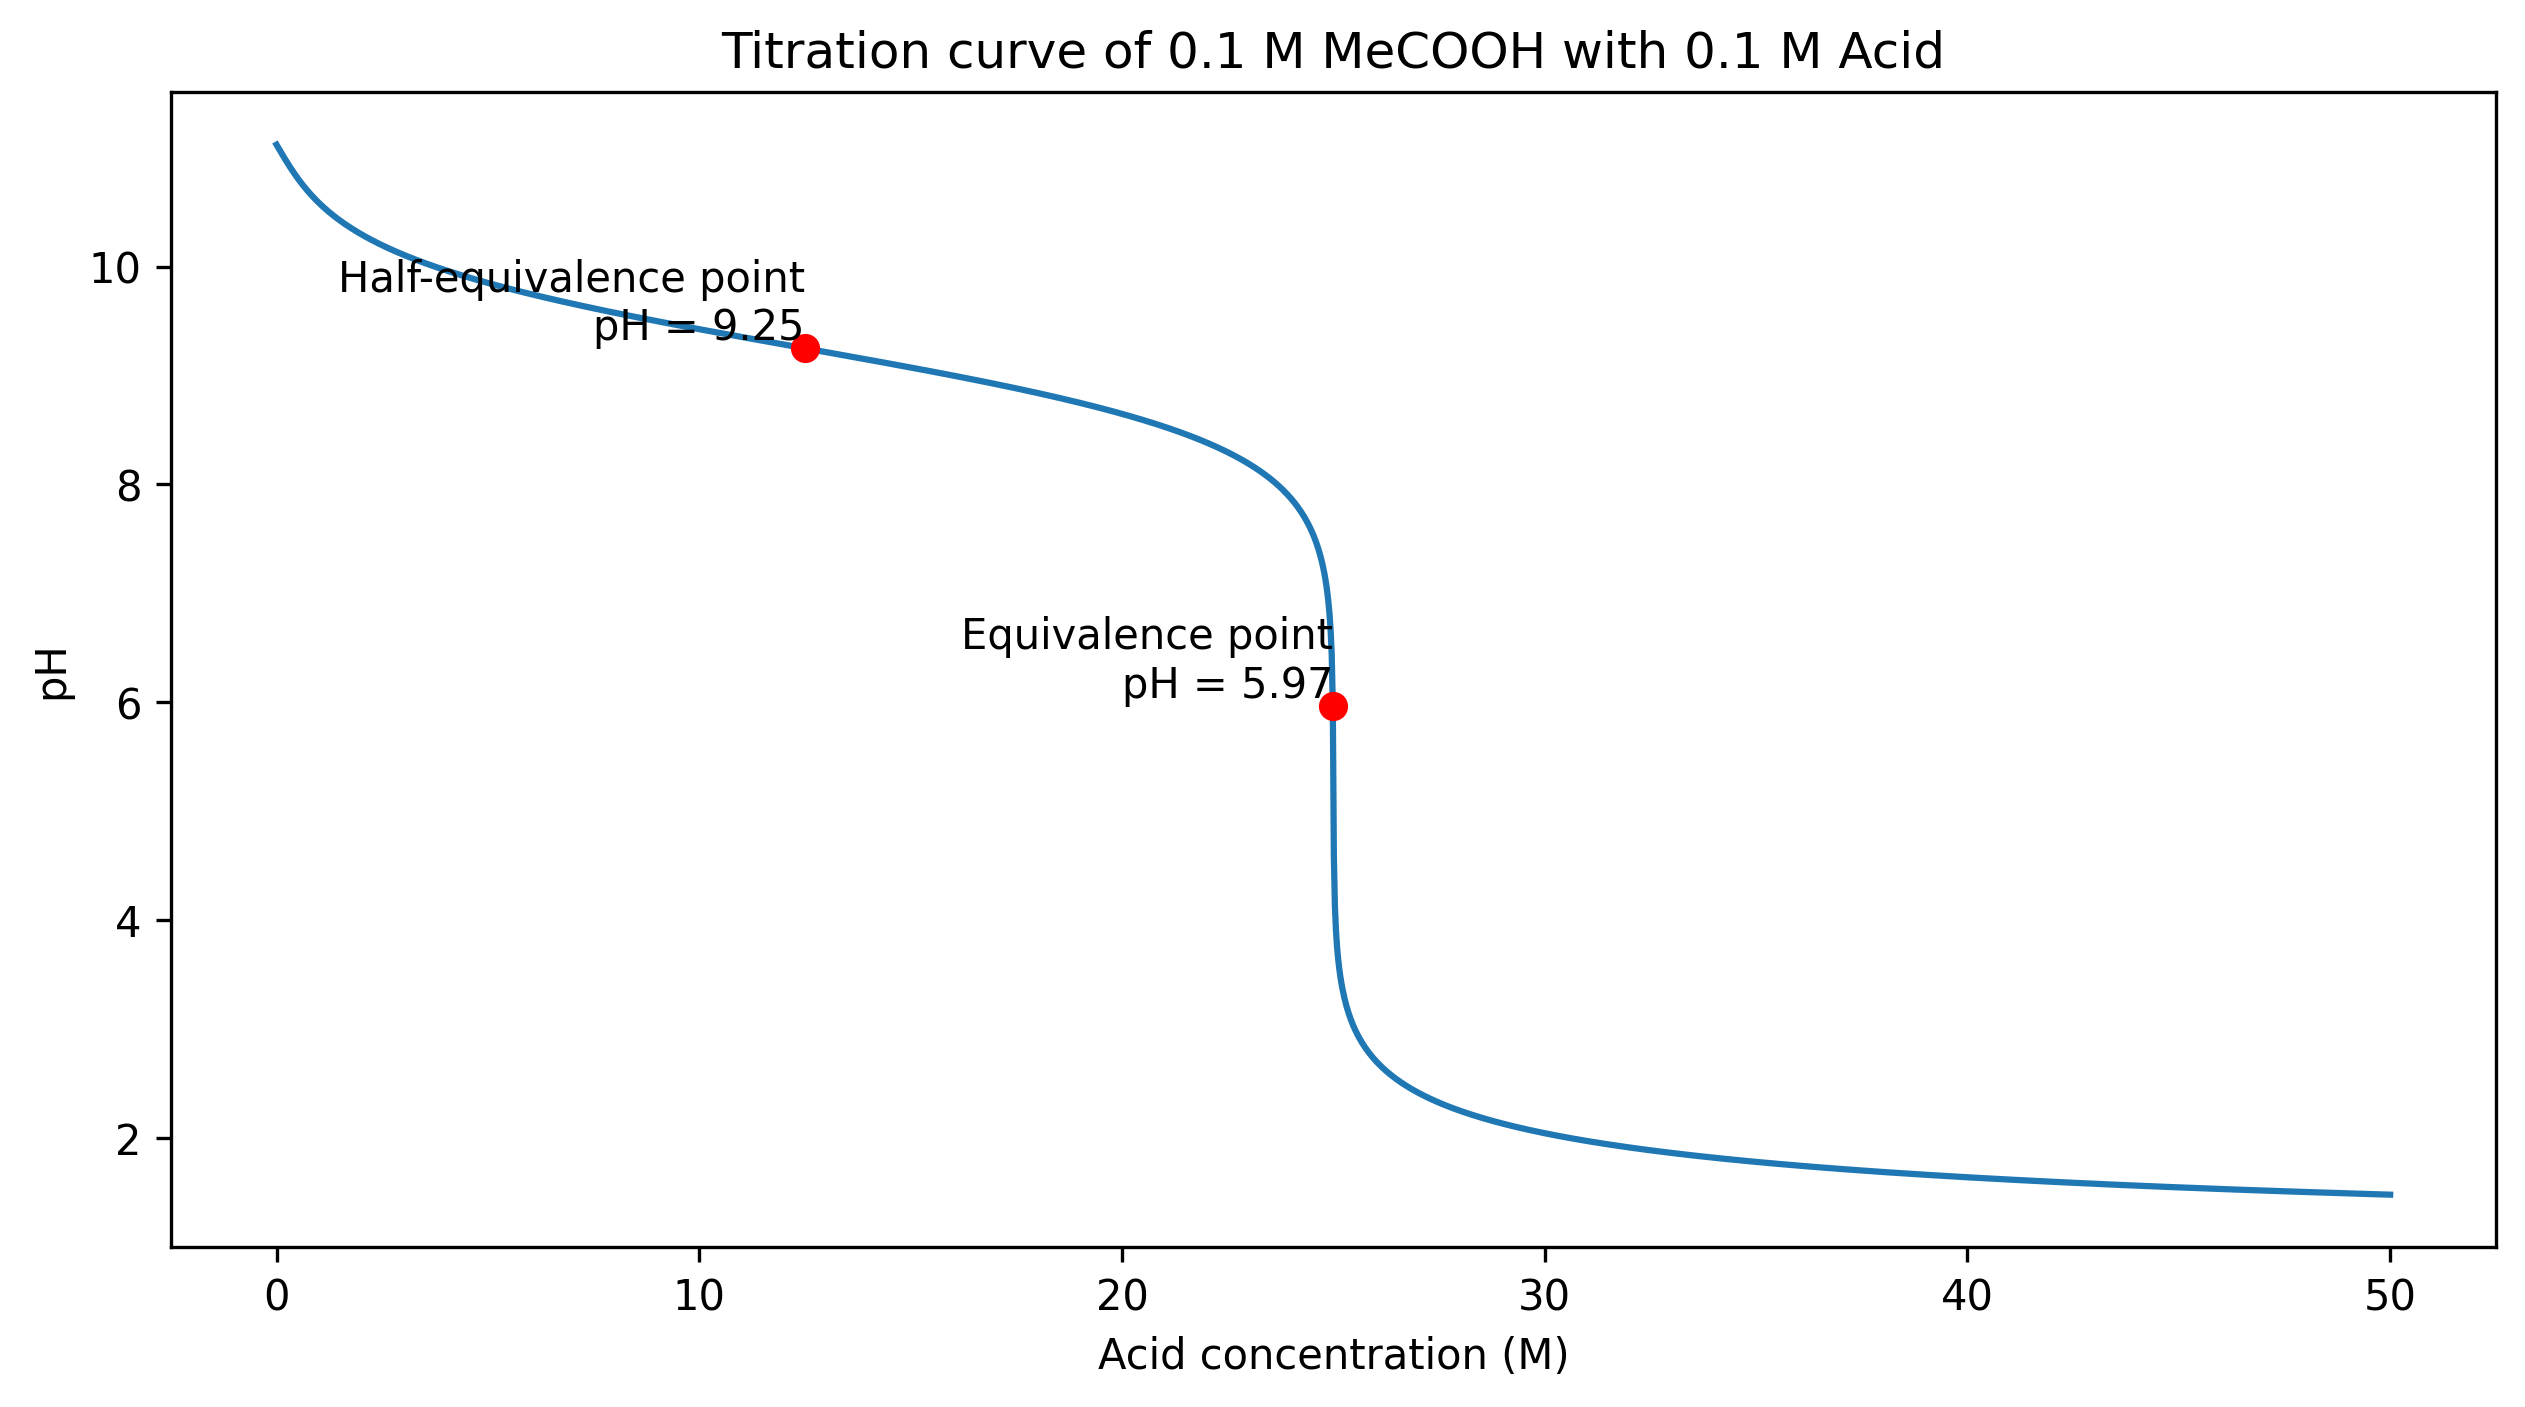

In [33]:
from phcal import *
import numpy as np
import matplotlib.pyplot as plt

Base_init_conc = 0.1
Acid_conc = 0.1

Base_init_vol = 25

titration = np.linspace(0, 50, 2000)
conc_Base_ = (Base_init_vol * Base_init_conc) / (Base_init_vol + titration)
conc_Acid = titration * Acid_conc / (Base_init_vol + titration)

pH = []

for i in range(len(titration)):
    Base_ = CBE_Acid(charge=1, pKa=9.25, conc=conc_Base_[i])
    Acid = CBE_Inert(charge=-1, conc=conc_Acid[i])
    s = CBE_calc(Base_, Acid)
    s.pH_calc()
    pH.append(s.pH)

plt.figure(figsize=(10, 5), dpi=300)

plt.plot(titration, pH)
plt.xlabel('Acid concentration (M)')
plt.ylabel('pH')

# Mark the equivalence point and the half-equivalence point
equivalence_point = 25
half_equivalence_point = equivalence_point / 2
equivalence_pH = pH[np.argmin(np.abs(titration - equivalence_point))]
half_equivalence_pH = pH[np.argmin(np.abs(titration - half_equivalence_point))]

# Mark the equivalence point and the half-equivalence point
plt.plot(equivalence_point, equivalence_pH, 'ro')
plt.plot(half_equivalence_point, half_equivalence_pH, 'ro')

# Add text to the plot
plt.text(equivalence_point, equivalence_pH, f'Equivalence point\npH = {equivalence_pH:.2f}', verticalalignment='bottom', horizontalalignment='right')
plt.text(half_equivalence_point, half_equivalence_pH, f'Half-equivalence point\npH = {half_equivalence_pH:.2f}', verticalalignment='bottom', horizontalalignment='right')

plt.title('Titration curve of 0.1 M MeCOOH with 0.1 M Acid')
plt.show()

## weak acid and weak base

The titration of 25 $\text{cm}^3$ 0.1 M MeCOOH with 0.1 M $\text{EtNH}_2$ can serve as an example for this case.

**Proton Balance Equation (PBE) based calculation**

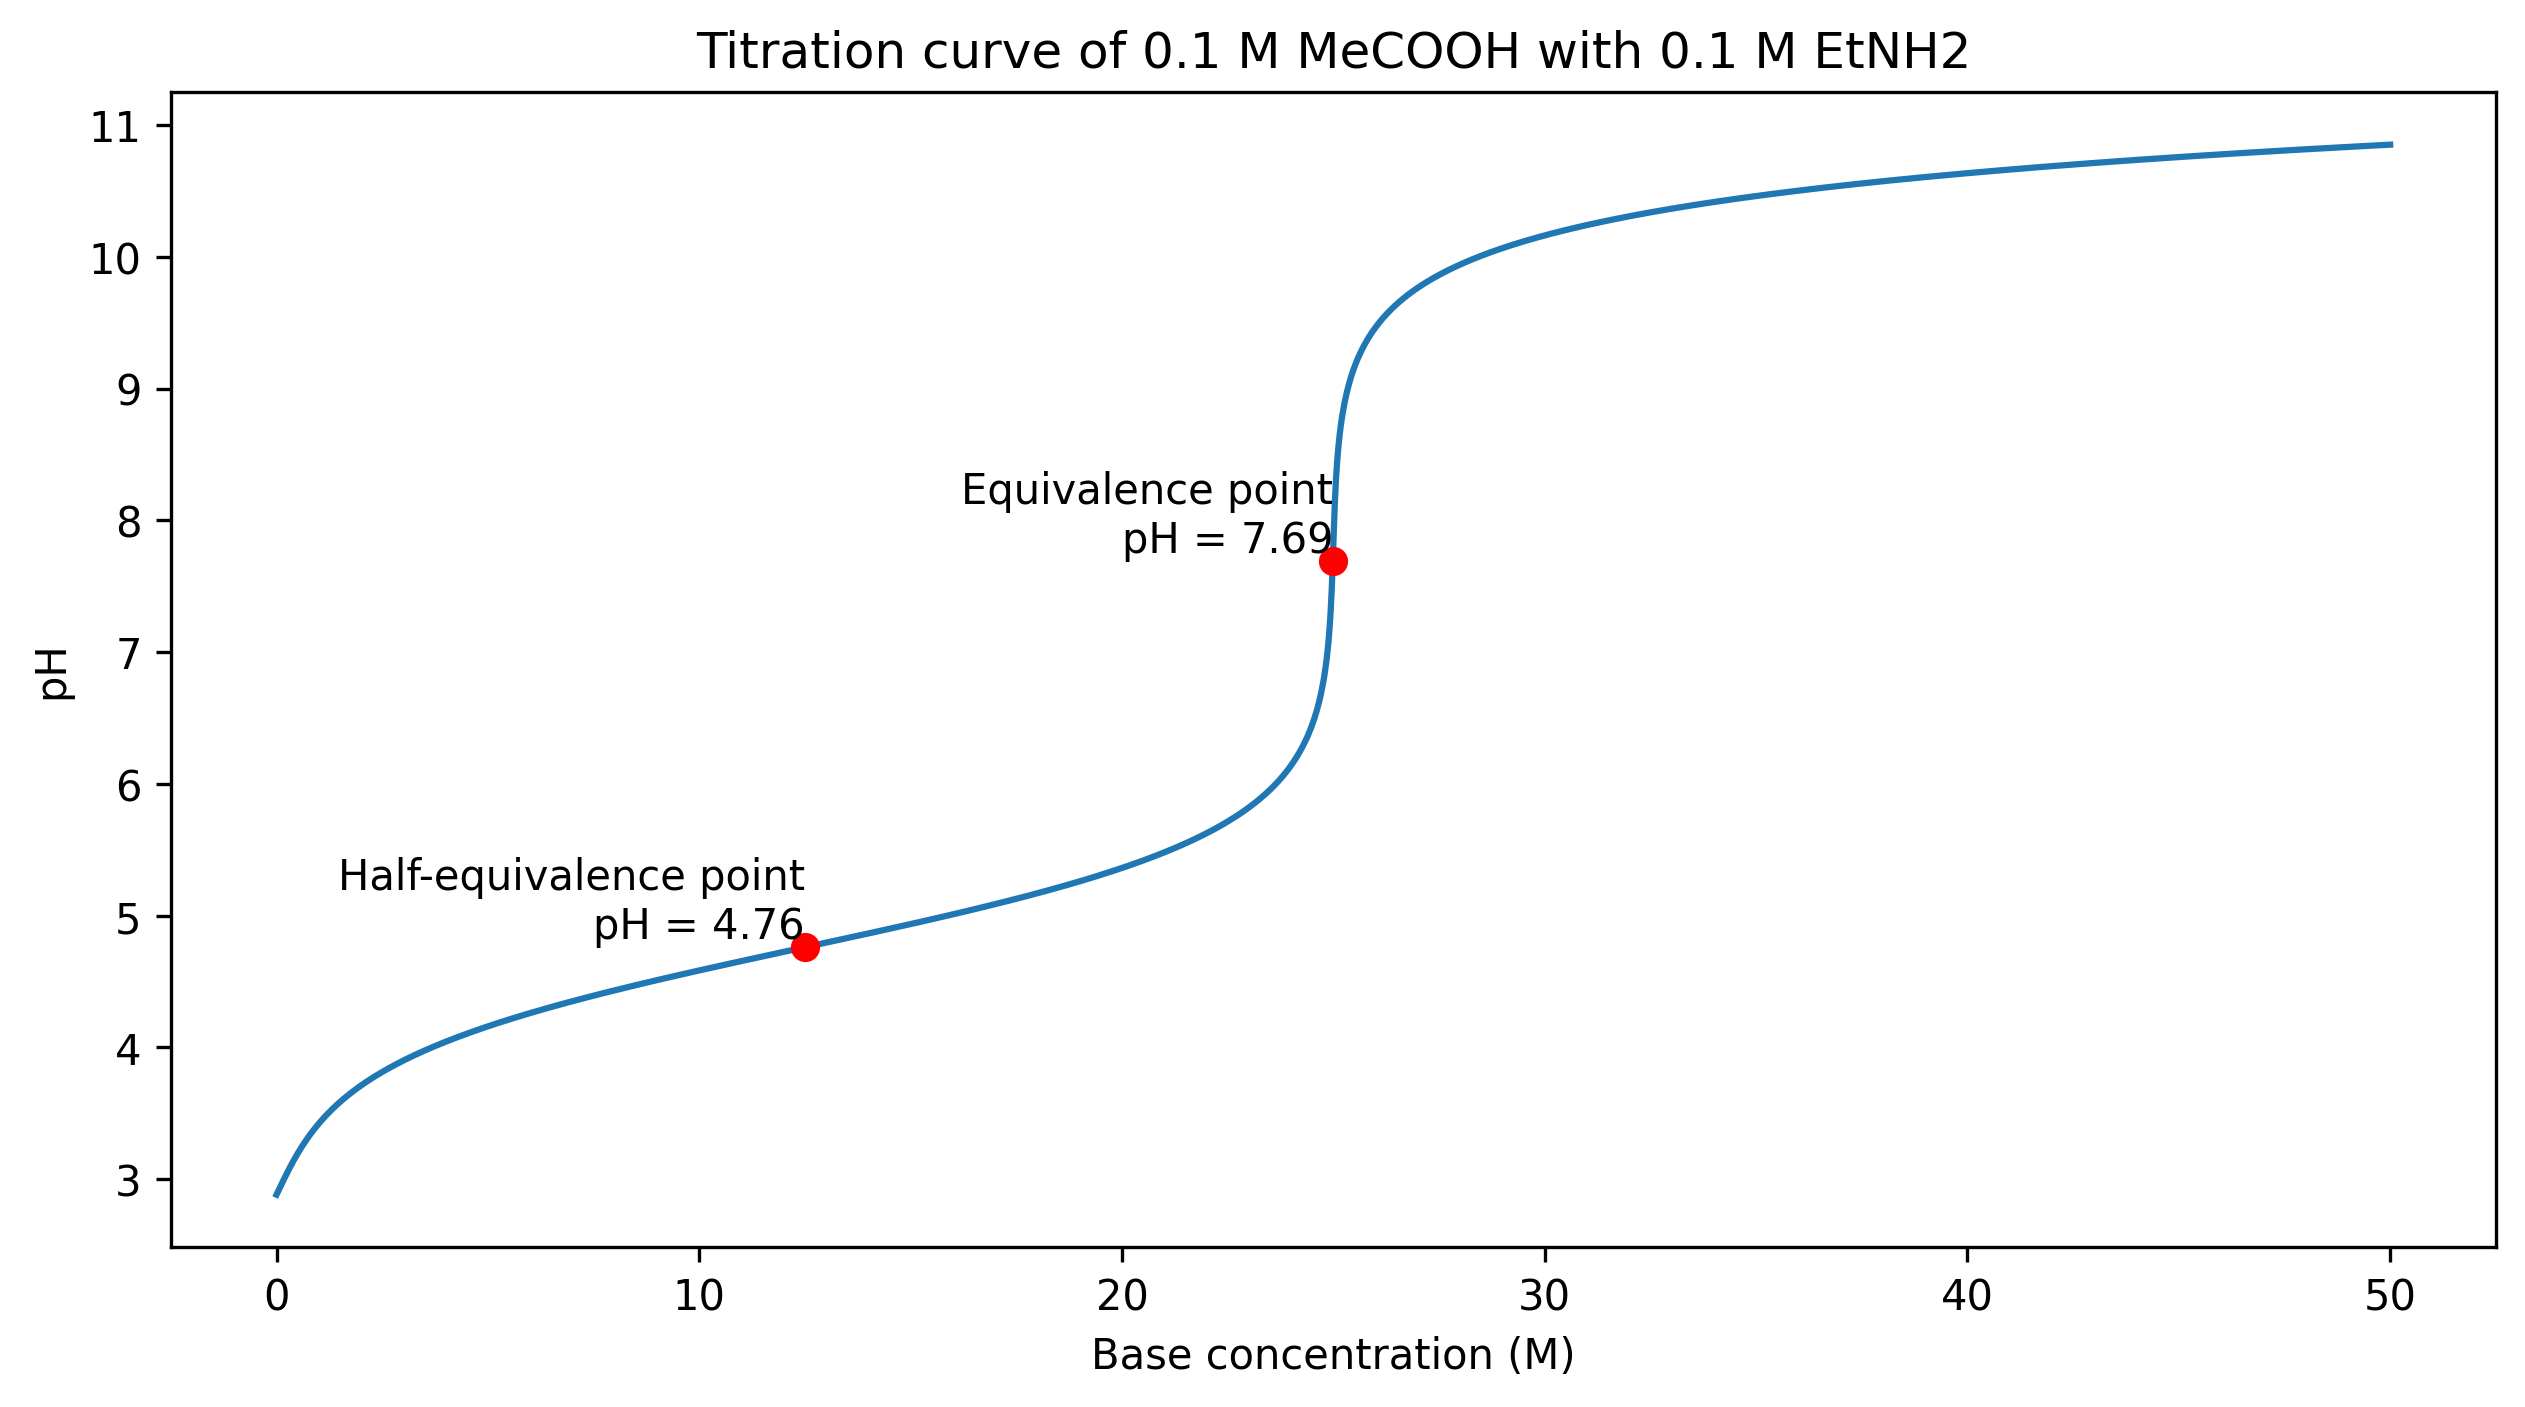

In [35]:
from phcal import *
import numpy as np
import matplotlib.pyplot as plt

Acid_init_conc = 0.1
Base_conc = 0.1

Acid_init_vol = 25

titration = np.linspace(0, 50, 2000)
conc_Acid = (Acid_init_vol * Acid_init_conc) / (Acid_init_vol + titration)
conc_Base = titration * Base_conc / (Acid_init_vol + titration)

pH = []

for i in range(len(titration)):
    Acid = PBE_Acid(proton=1, proton_ref=1, pKa=4.76, conc=conc_Acid[i])
    Base = PBE_Acid(proton=1, proton_ref=0, pKa=10.87, conc=conc_Base[i])
    s = PBE_calc(Acid, Base)
    s.pH_calc()
    pH.append(s.pH)

plt.figure(figsize=(10, 5), dpi=300)

plt.plot(titration, pH)
plt.xlabel('Base concentration (M)')
plt.ylabel('pH')

# Mark the equivalence point and the half-equivalence point
equivalence_point = 25
half_equivalence_point = equivalence_point / 2
equivalence_pH = pH[np.argmin(np.abs(titration - equivalence_point))]
half_equivalence_pH = pH[np.argmin(np.abs(titration - half_equivalence_point))]

# Mark the equivalence point and the half-equivalence point
plt.plot(equivalence_point, equivalence_pH, 'ro')
plt.plot(half_equivalence_point, half_equivalence_pH, 'ro')

# Add text to the plot
plt.text(equivalence_point, equivalence_pH, f'Equivalence point\npH = {equivalence_pH:.2f}', verticalalignment='bottom', horizontalalignment='right')
plt.text(half_equivalence_point, half_equivalence_pH, f'Half-equivalence point\npH = {half_equivalence_pH:.2f}', verticalalignment='bottom', horizontalalignment='right')

plt.title('Titration curve of 0.1 M MeCOOH with 0.1 M EtNH2')
plt.show()

**Charge Balance Equation (CBE) based calculation** 

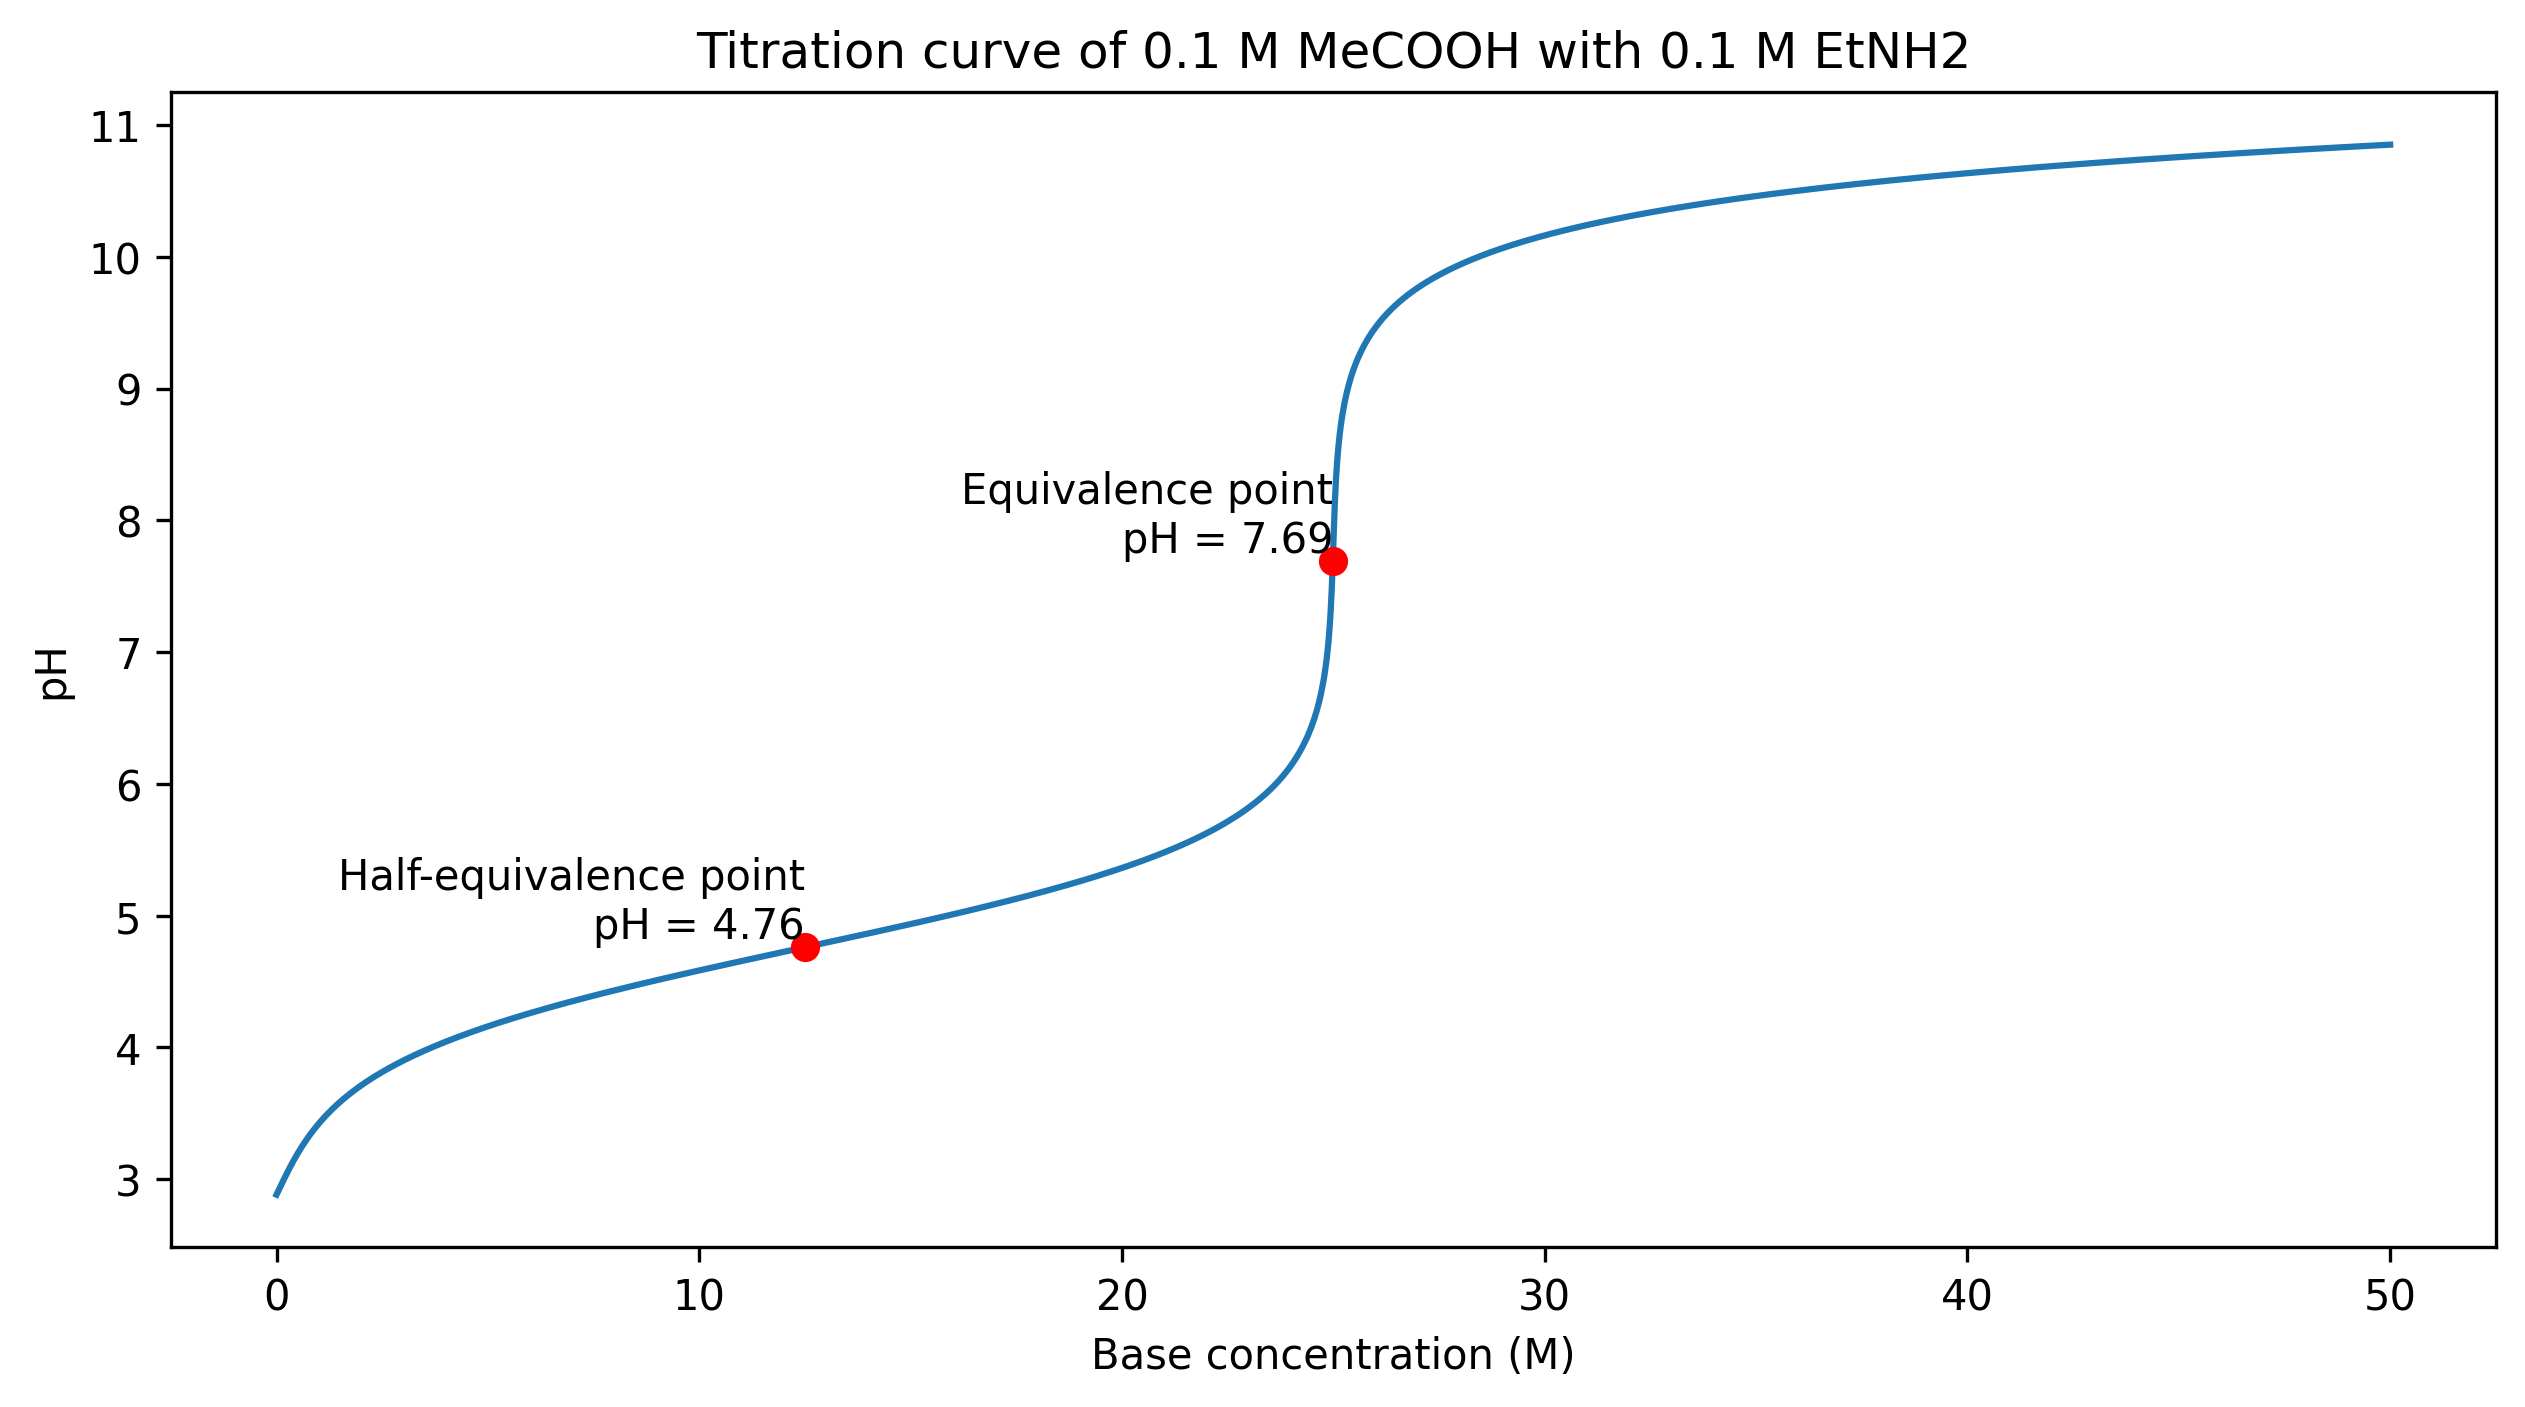

In [40]:
from phcal import *
import numpy as np
import matplotlib.pyplot as plt

Acid_init_conc = 0.1
Base_conc = 0.1

Acid_init_vol = 25

titration = np.linspace(0, 50, 2000)
conc_Acid = (Acid_init_vol * Acid_init_conc) / (Acid_init_vol + titration)
conc_Base = titration * Base_conc / (Acid_init_vol + titration)

pH = []

for i in range(len(titration)):
    Acid = CBE_Acid(charge=0, pKa=4.76, conc=conc_Acid[i])
    Base = CBE_Acid(charge=1, pKa=10.87, conc=conc_Base[i])
    # A note: why the charge of base (EtNH2) is 1, not 0?
    # Because we are using the pKa of the conjugate acid of the base, not the base itself.
    # The conjugate acid of EtNH2 is EtNH3+, which has a charge of 1.
    s = CBE_calc(Acid, Base)
    s.pH_calc()
    pH.append(s.pH)

plt.figure(figsize=(10, 5), dpi=300)

plt.plot(titration, pH)
plt.xlabel('Base concentration (M)')
plt.ylabel('pH')

# Mark the equivalence point and the half-equivalence point
equivalence_point = 25
half_equivalence_point = equivalence_point / 2
equivalence_pH = pH[np.argmin(np.abs(titration - equivalence_point))]
half_equivalence_pH = pH[np.argmin(np.abs(titration - half_equivalence_point))]

# Mark the equivalence point and the half-equivalence point
plt.plot(equivalence_point, equivalence_pH, 'ro')
plt.plot(half_equivalence_point, half_equivalence_pH, 'ro')

# Add text to the plot
plt.text(equivalence_point, equivalence_pH, f'Equivalence point\npH = {equivalence_pH:.2f}', verticalalignment='bottom', horizontalalignment='right')
plt.text(half_equivalence_point, half_equivalence_pH, f'Half-equivalence point\npH = {half_equivalence_pH:.2f}', verticalalignment='bottom', horizontalalignment='right')

plt.title('Titration curve of 0.1 M MeCOOH with 0.1 M EtNH2')
plt.show()

# Well... Are you doing an experiment? Do you need some deviations (experimental errors)?

## strong acid and strong base, Proton Based Equation (PBE) based calculation

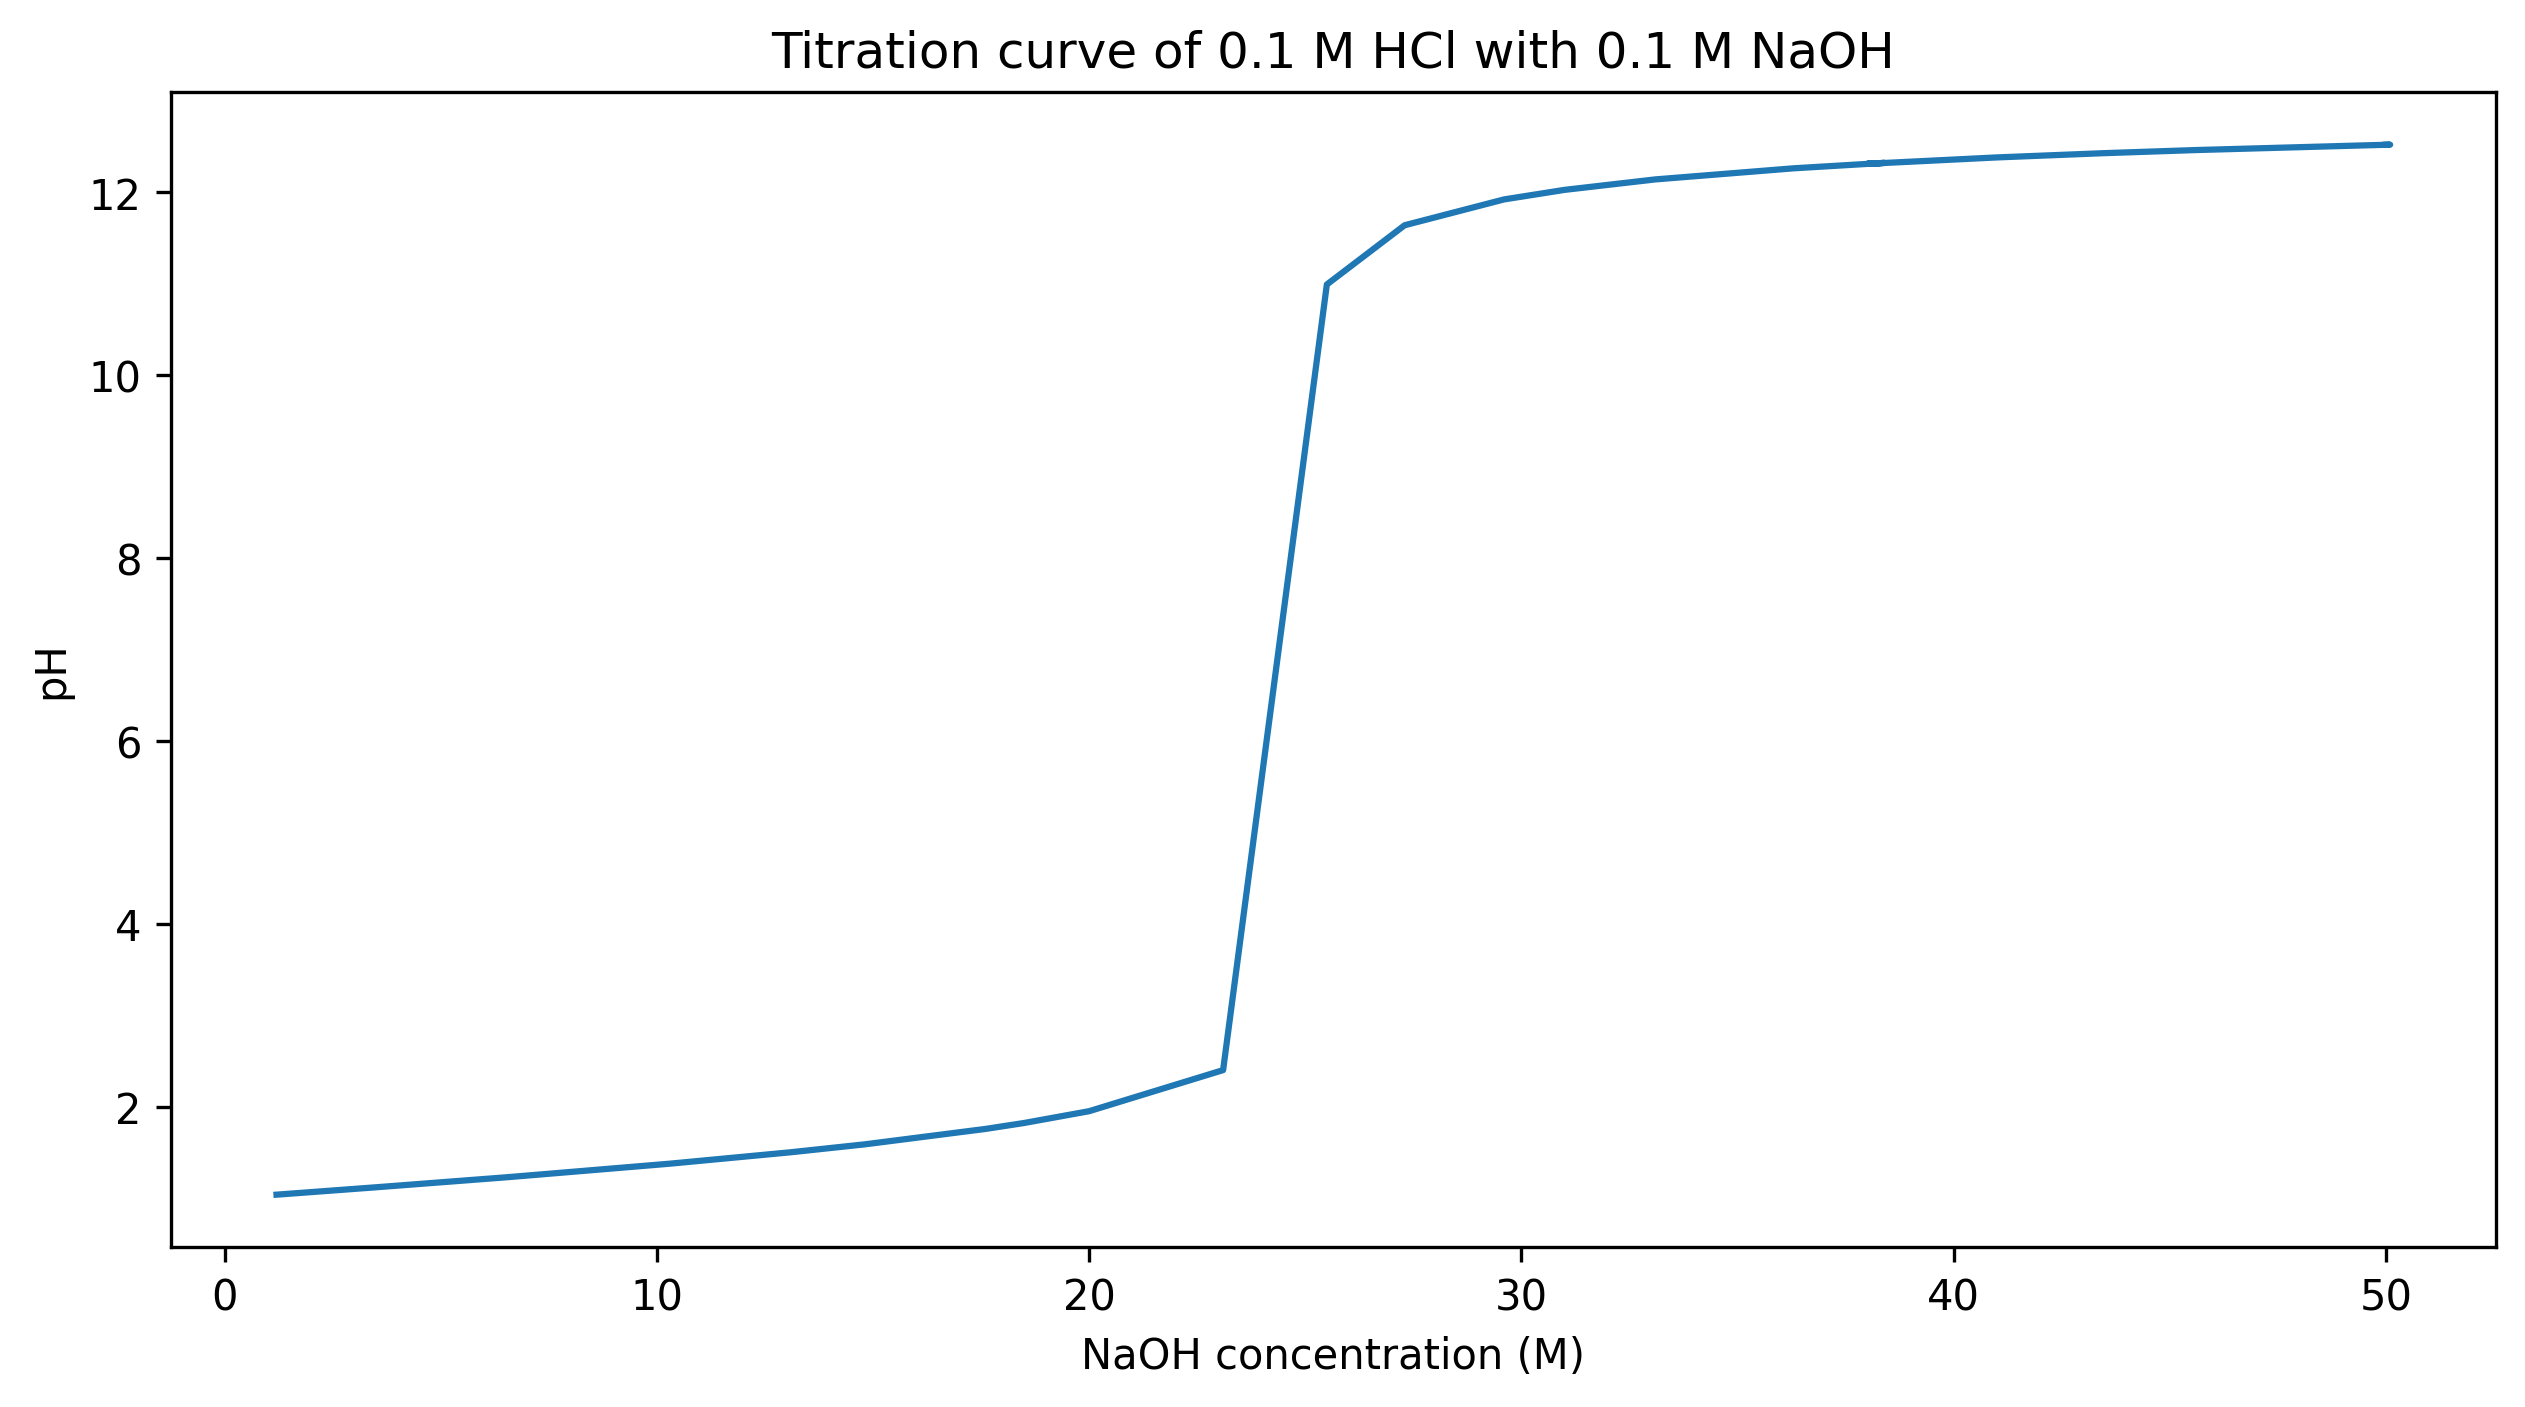

/var/folders/d3/wb1r3r4j1pvfyg69vd96y4y40000gn/T/ipykernel_567/1824699783.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


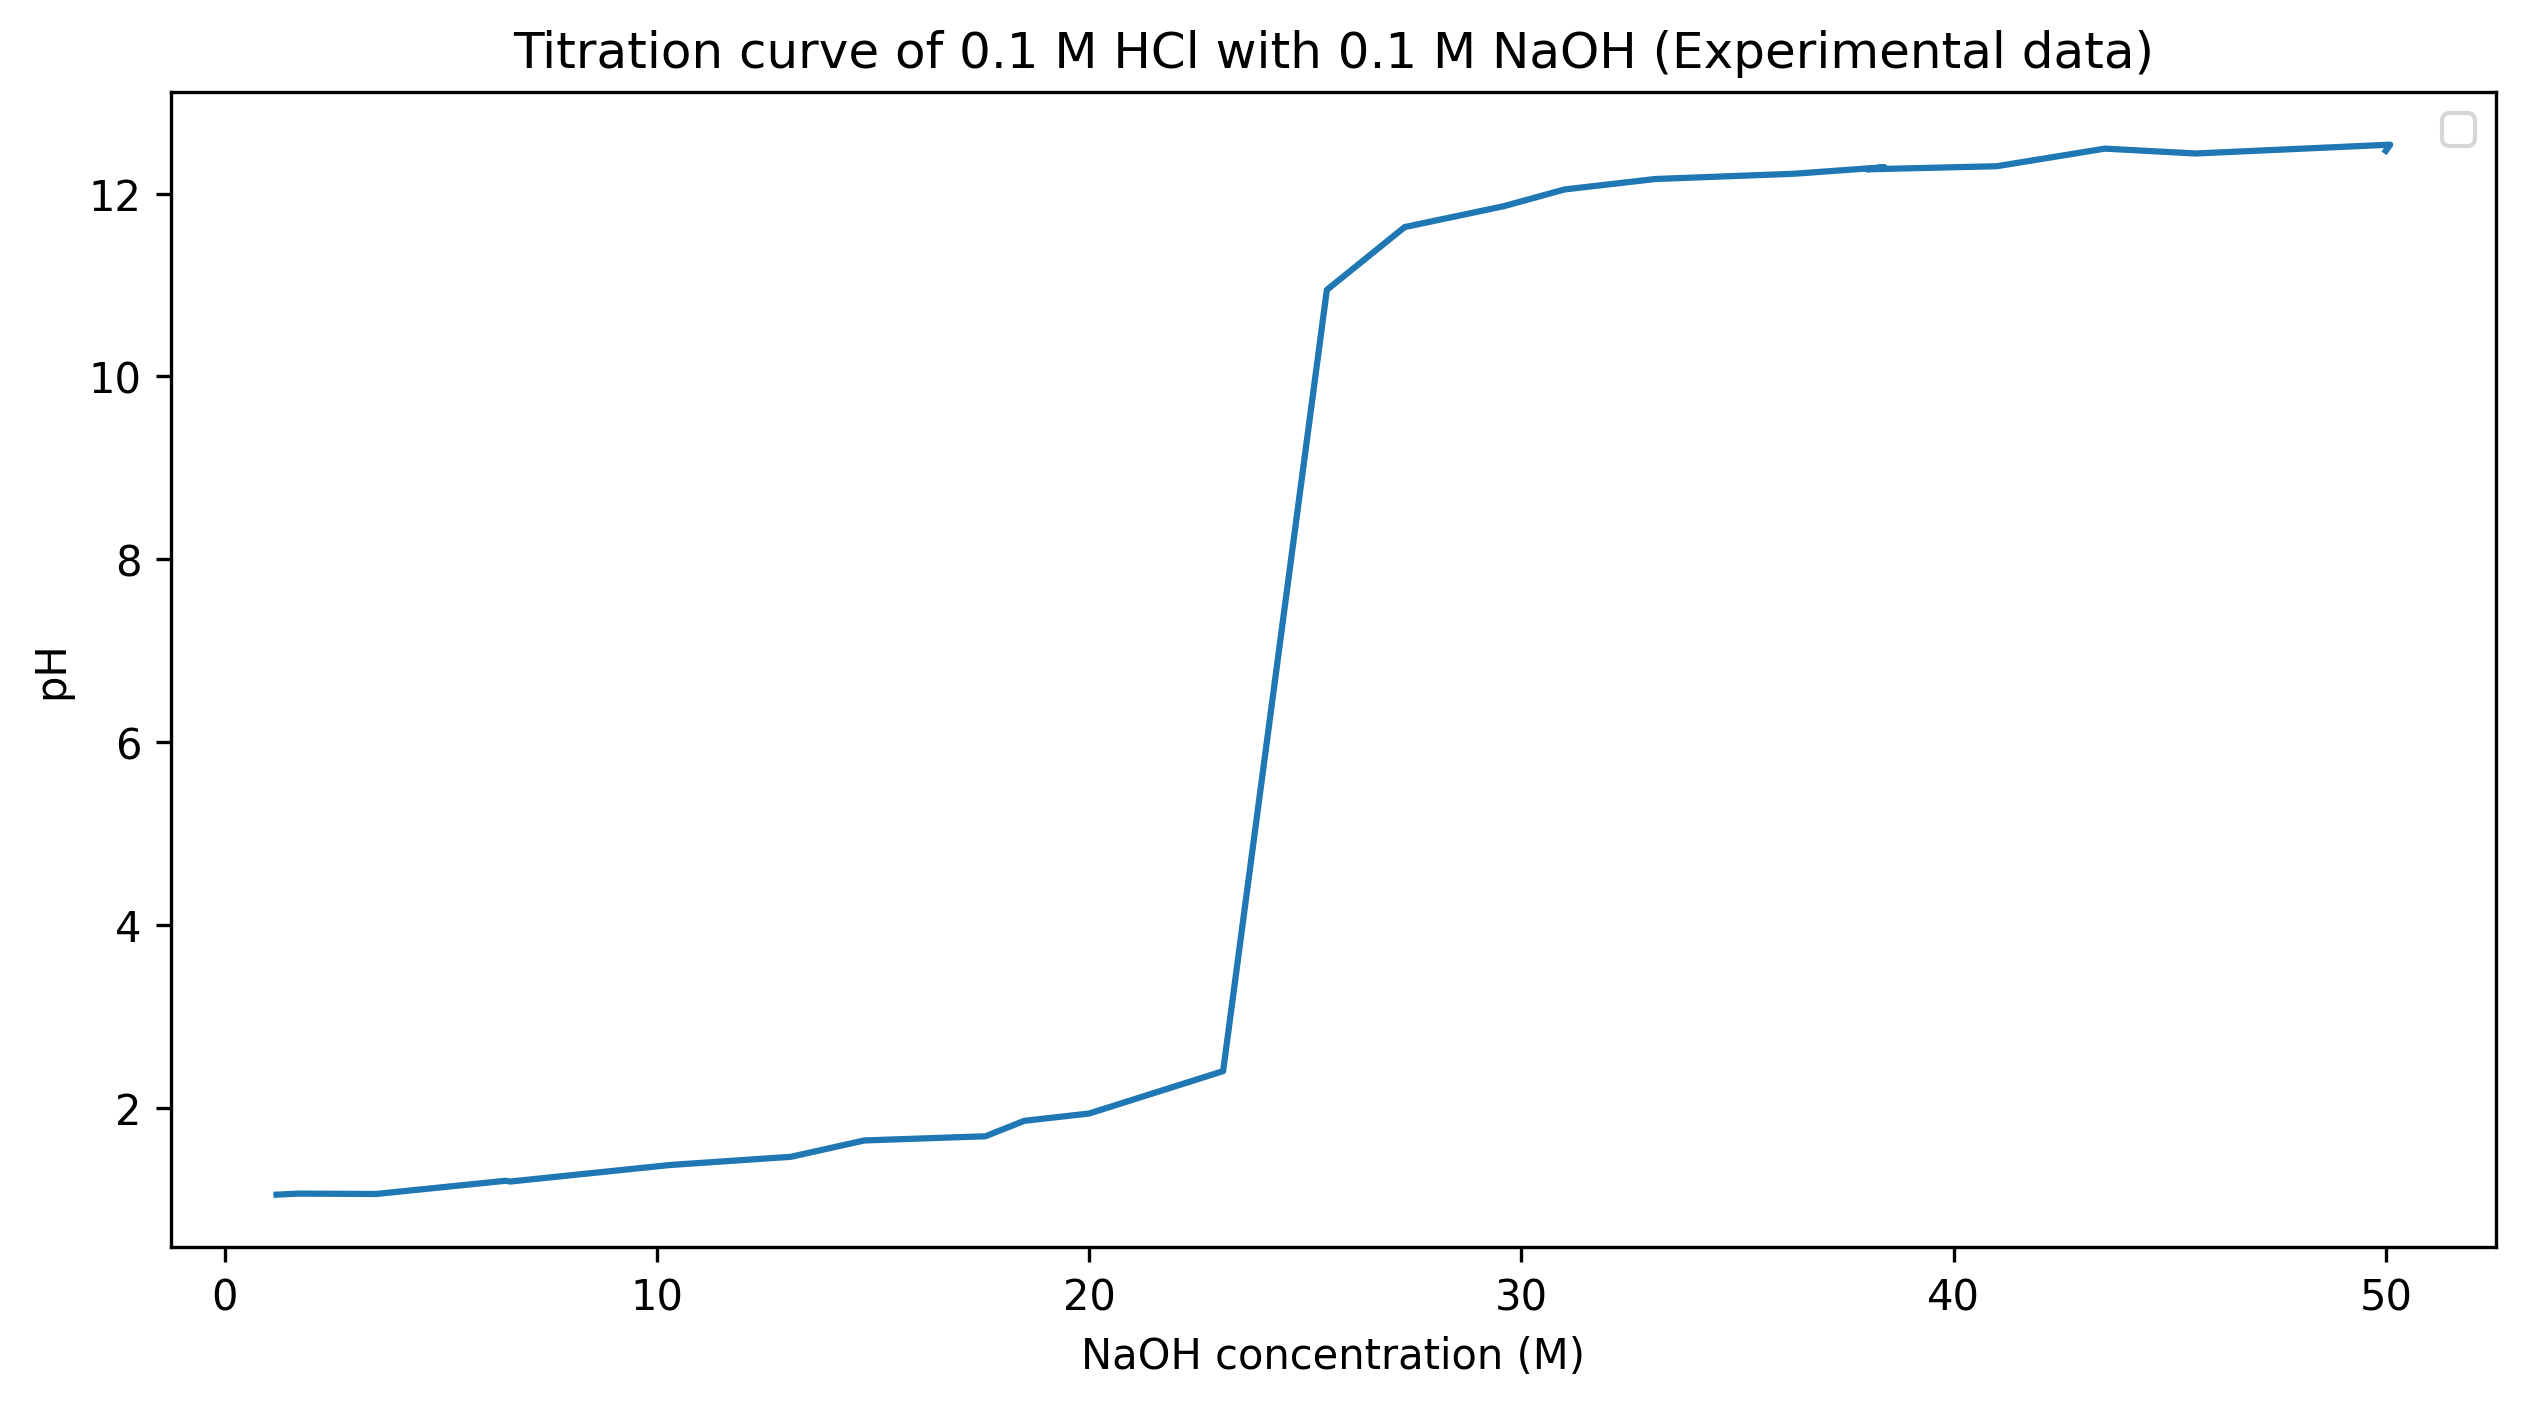

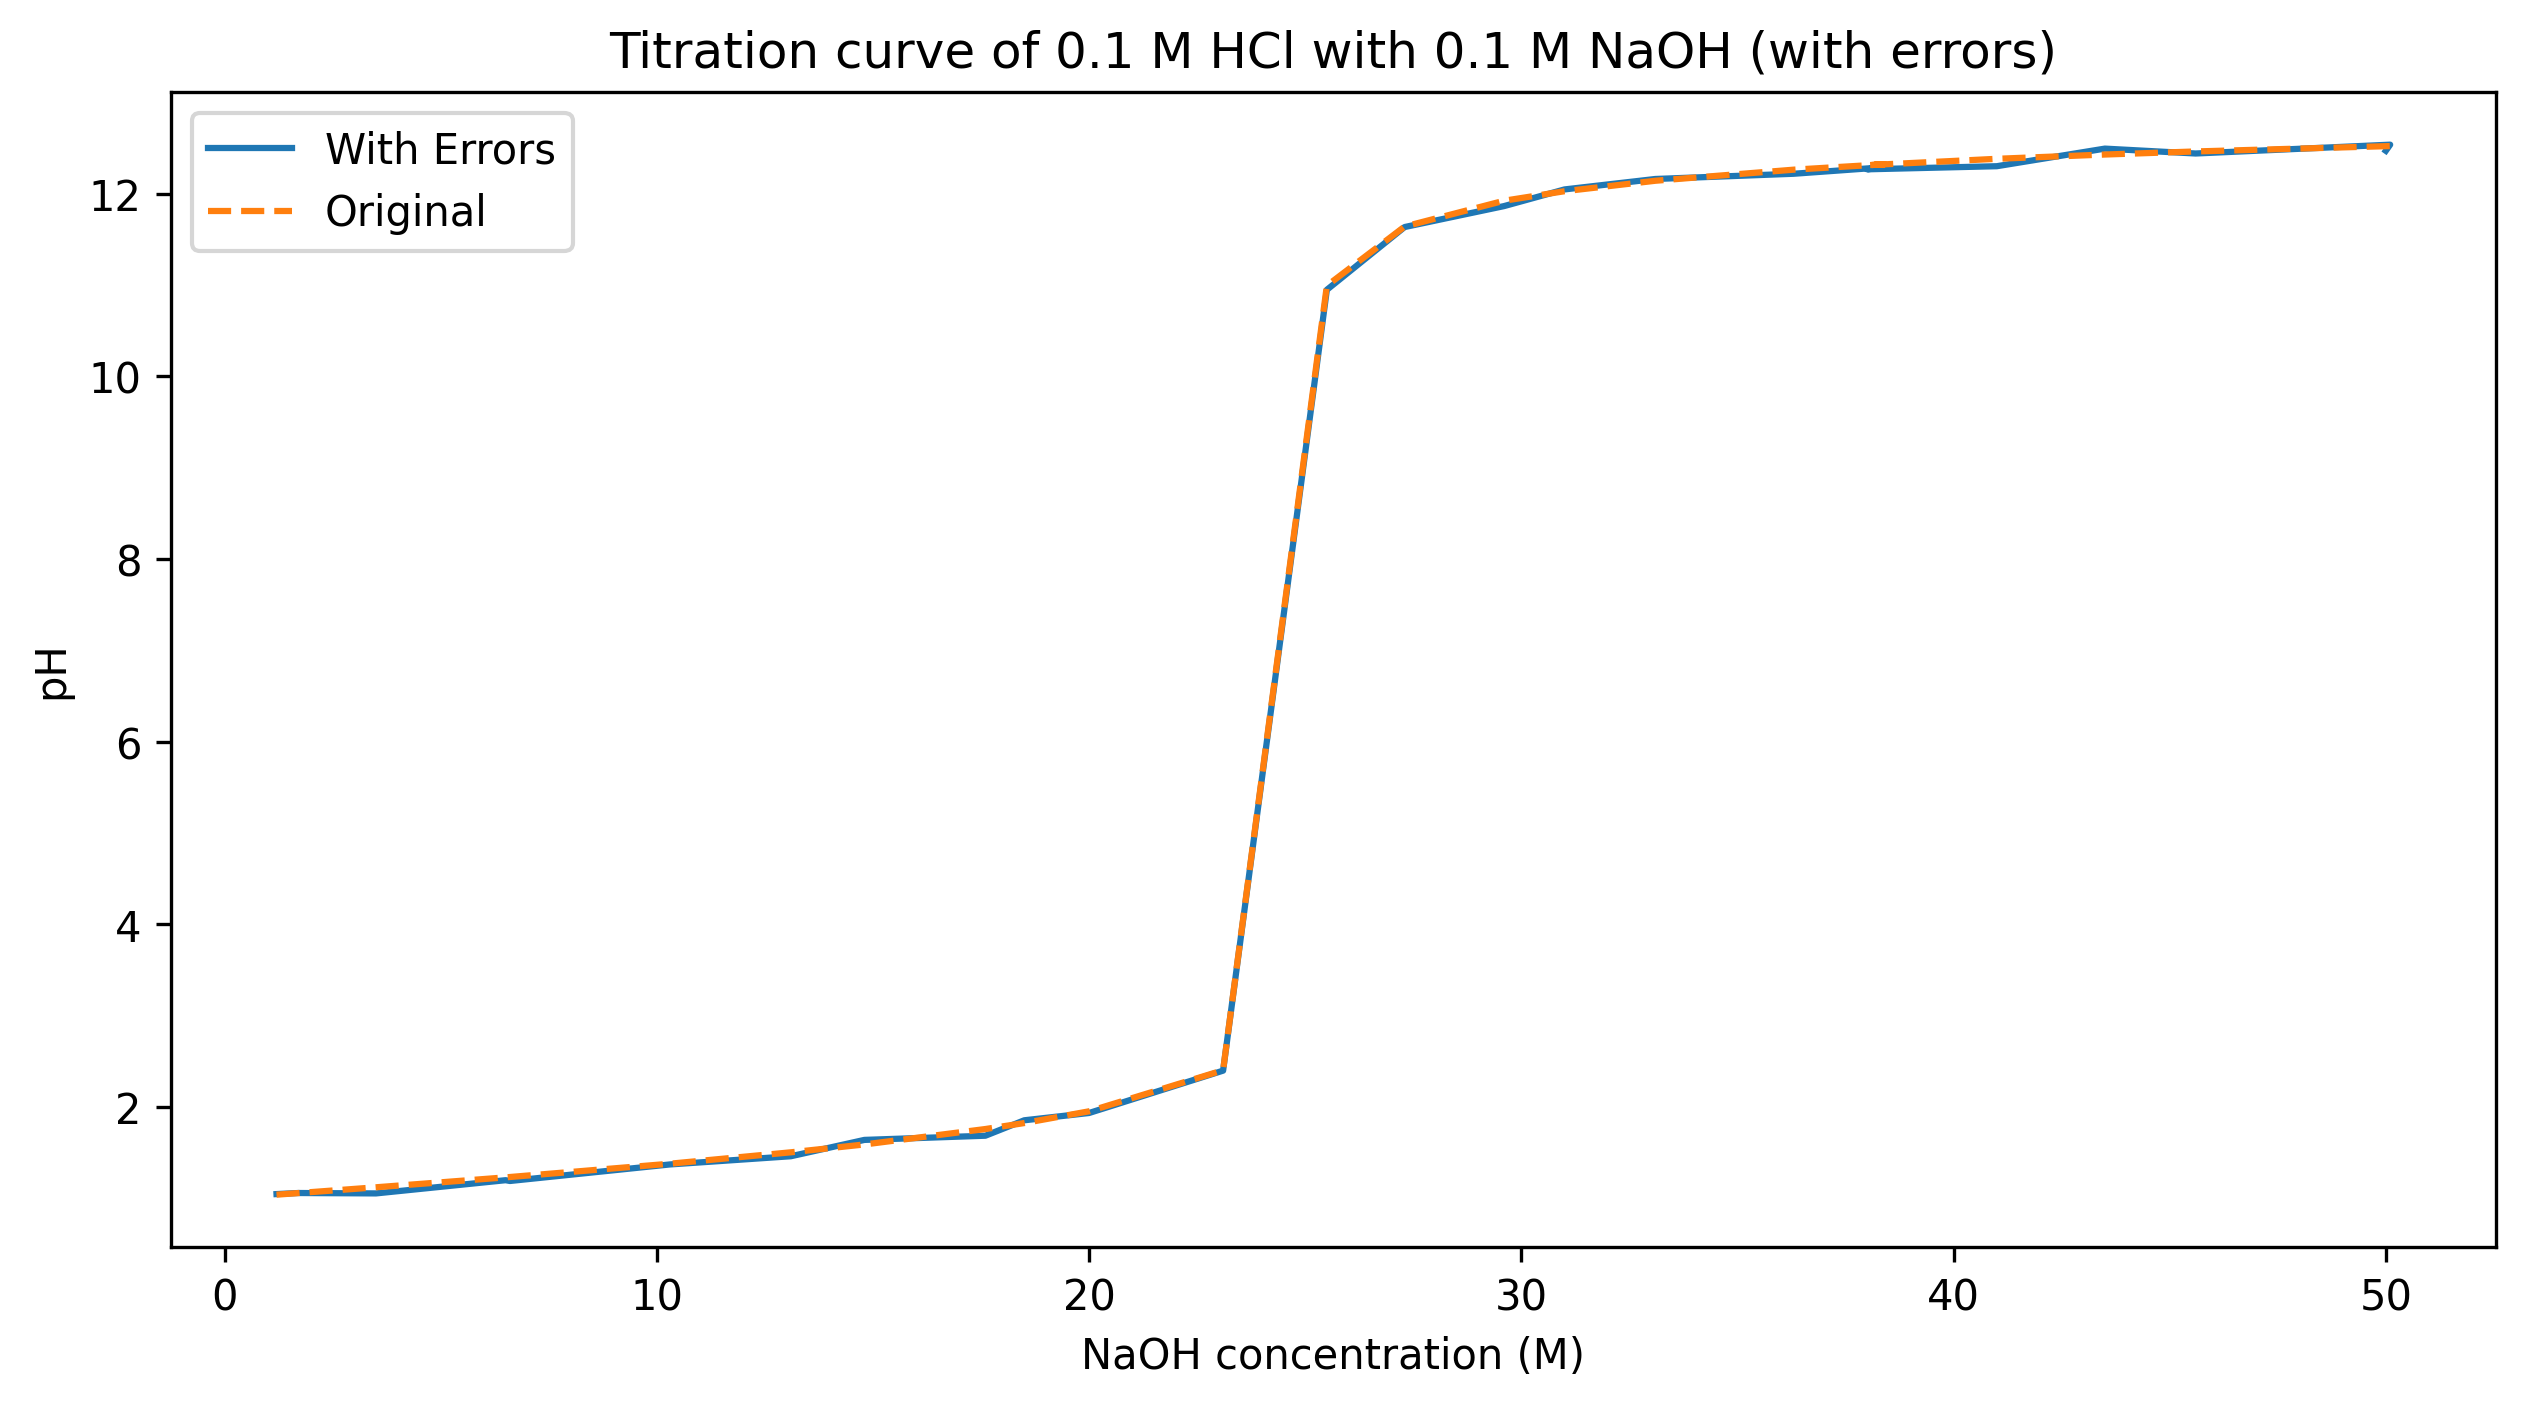

    NaOH (M)         pH
0        1.2   1.048076
1        1.7   1.059782
2        3.5   1.055474
3        6.5   1.200113
4        6.6   1.191520
5       10.3   1.372493
6       13.1   1.462351
7       14.8   1.641131
8       17.6   1.686988
9       18.5   1.855837
10      20.0   1.935872
11      23.1   2.399329
12      25.5  10.946432
13      27.3  11.633452
14      29.6  11.862667
15      31.0  12.045129
16      33.1  12.159472
17      36.3  12.216600
18      38.4  12.288284
19      38.0  12.265278
20      41.0  12.299244
21      43.5  12.491793
22      45.6  12.438342
23      50.1  12.535039
24      50.0  12.468024


In [54]:
from phcal import *
import numpy as np
import matplotlib.pyplot as plt

hcl_init_conc = 0.1
naoh_conc = 0.1

hcl_init_vol = 25

titration = np.linspace(0, 50, 25)
# Add some random noise to the titration data
titration += np.random.normal(0, 1, len(titration))
titration[titration < 0] = 0
titration[-1] = 50
# # round to nearest 0.5
# titration = np.round(titration * 2) / 2
# round to nearest 0.1
titration = np.round(titration * 10) / 10
conc_hcl = (hcl_init_vol * hcl_init_conc) / (hcl_init_vol + titration)
conc_naoh = titration * naoh_conc / (hcl_init_vol + titration)

pH = []

for i in range(len(titration)):
    HCl = PBE_Inert(proton=1, proton_ref=1, conc=conc_hcl[i])
    NaOH = PBE_Inert(proton=0, proton_ref=-1, conc=conc_naoh[i])
    s = PBE_calc(HCl, NaOH)
    s.pH_calc()
    pH.append(s.pH)

plt.figure(figsize=(10, 5), dpi=300)

plt.plot(titration, pH)
plt.xlabel('NaOH concentration (M)')
plt.ylabel('pH')

plt.title('Titration curve of 0.1 M HCl with 0.1 M NaOH')
plt.show()
# Introduce random errors to simulate experimental deviations
error_factor = 0.05  # 5% error

# Apply random errors to the pH values
pH_with_errors = pH + np.random.normal(0, error_factor, len(pH))

plt.figure(figsize=(10, 5), dpi=300)
plt.xlabel('NaOH concentration (M)')
plt.ylabel('pH')
plt.plot(titration, pH_with_errors)
plt.title('Titration curve of 0.1 M HCl with 0.1 M NaOH (Experimental data)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5), dpi=300)

plt.plot(titration, pH_with_errors, label='With Errors')
plt.plot(titration, pH, label='Original', linestyle='--')
plt.xlabel('NaOH concentration (M)')
plt.ylabel('pH')

plt.title('Titration curve of 0.1 M HCl with 0.1 M NaOH (with errors)')
plt.legend()
plt.show()

# Generate a table of experimental data
import pandas as pd

data = {'NaOH (M)': titration,
        'pH': pH_with_errors}
df = pd.DataFrame(data)
# df.to_csv('experimental_data.csv', index=False)
print(df)

/var/folders/d3/wb1r3r4j1pvfyg69vd96y4y40000gn/T/ipykernel_567/2344427602.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


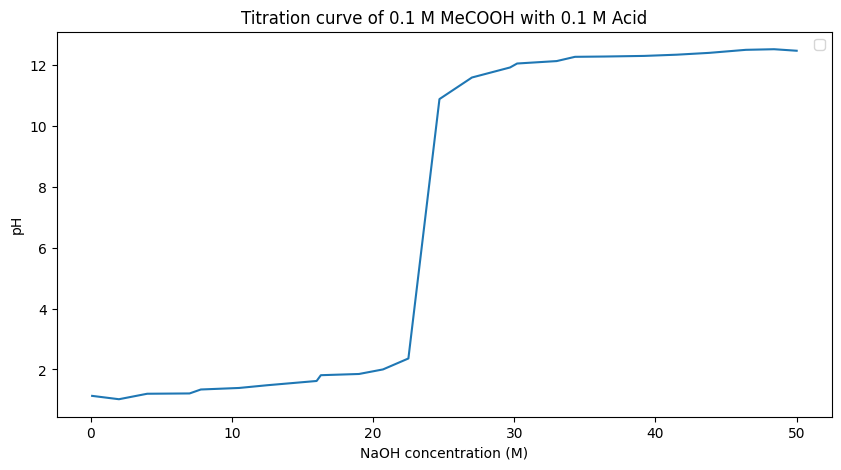

    NaOH (M)     pH
0        0.1   1.13
1        2.0   1.02
2        4.0   1.20
3        7.0   1.21
4        7.8   1.34
5       10.5   1.39
6       12.5   1.48
7       16.0   1.62
8       16.3   1.81
9       19.0   1.85
10      20.7   2.00
11      22.5   2.36
12      24.7  10.89
13      27.0  11.60
14      29.7  11.93
15      30.2  12.06
16      33.0  12.14
17      34.3  12.28
18      36.4  12.29
19      39.2  12.31
20      41.5  12.35
21      43.8  12.41
22      46.4  12.51
23      48.4  12.53
24      50.0  12.48


In [101]:
from phcal import *
import numpy as np
import matplotlib.pyplot as plt

hcl_init_conc = 0.1
naoh_conc = 0.1

hcl_init_vol = 25

titration = np.linspace(0, 50, 25)
titration += np.random.normal(0, 0.5, len(titration))
titration[titration < 0] = 0
titration[-1] = 50
titration = np.round(titration * 10) / 10
titration = np.unique(titration)
titration = np.sort(titration)
conc_Base_ = (Base_init_vol * Base_init_conc) / (Base_init_vol + titration)
conc_Acid = titration * Acid_conc / (Base_init_vol + titration)

pH = []

for i in range(len(titration)):
    HCl = PBE_Inert(proton=1, proton_ref=1, conc=conc_hcl[i])
    NaOH = PBE_Inert(proton=0, proton_ref=-1, conc=conc_naoh[i])
    s = PBE_calc(HCl, NaOH)
    s.pH_calc()
    pH.append(s.pH)

plt.figure(figsize=(10, 5), dpi=100)

error_factor = 0.05
pH_with_errors = pH + np.random.normal(0, error_factor, len(pH))

pH_with_errors = np.round(pH_with_errors, 2)

plt.plot(titration, pH_with_errors)
plt.xlabel('NaOH concentration (M)')
plt.ylabel('pH')

plt.title('Titration curve of 0.1 M MeCOOH with 0.1 M Acid')
plt.legend()
plt.show()

import pandas as pd

data = {'NaOH (M)': titration,
        'pH': pH_with_errors}
df = pd.DataFrame(data)
print(df)

**weak acid and strong base, Proton Based Equation (PBE) based calculation**

/var/folders/d3/wb1r3r4j1pvfyg69vd96y4y40000gn/T/ipykernel_567/3844022338.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


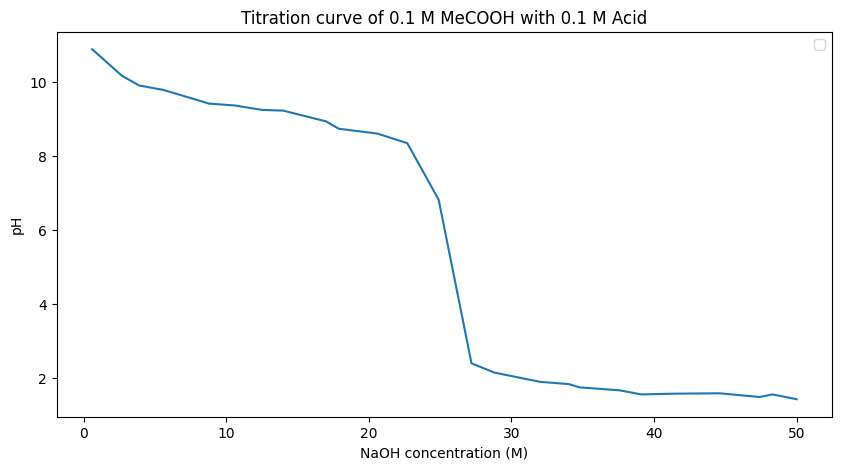

    NaOH (M)     pH
0        0.6  10.89
1        2.7  10.17
2        3.9   9.91
3        5.6   9.79
4        8.8   9.42
5       10.6   9.37
6       12.5   9.25
7       14.0   9.23
8       17.0   8.94
9       17.9   8.74
10      20.6   8.61
11      22.7   8.35
12      24.9   6.82
13      27.2   2.40
14      28.8   2.15
15      32.0   1.90
16      34.0   1.84
17      34.8   1.75
18      37.6   1.67
19      39.1   1.56
20      41.4   1.58
21      44.6   1.59
22      47.4   1.49
23      48.3   1.56
24      50.0   1.43


In [83]:
from phcal import *
import numpy as np
import matplotlib.pyplot as plt

Base_init_conc = 0.1
Acid_conc = 0.1

Base_init_vol = 25

titration = np.linspace(0, 50, 25)
titration += np.random.normal(0, 0.5, len(titration))
titration[titration < 0] = 0
titration[-1] = 50
titration = np.round(titration * 10) / 10
# remove duplicates
titration = np.unique(titration)
# sort the array
titration = np.sort(titration)
conc_Base_ = (Base_init_vol * Base_init_conc) / (Base_init_vol + titration)
conc_Acid = titration * Acid_conc / (Base_init_vol + titration)

pH = []

for i in range(len(titration)):
    Base_ = PBE_Acid(proton=1, proton_ref=0, pKa=9.25, conc=conc_Base_[i])
    Acid = PBE_Inert(proton=0, proton_ref=1, conc=conc_Acid[i])
    s = PBE_calc(Base_, Acid)
    s.pH_calc()
    pH.append(s.pH)

plt.figure(figsize=(10, 5), dpi=100)

error_factor = 0.05
pH_with_errors = pH + np.random.normal(0, error_factor, len(pH))

# round pH to 2 decimal places
pH_with_errors = np.round(pH_with_errors, 2)

# plt.plot(titration, pH_with_errors, label='Experimental')
# plt.plot(titration, pH, label='Theoretical', linestyle='--')
plt.plot(titration, pH_with_errors)
# make the curve smooth
plt.xlabel('NaOH concentration (M)')
plt.ylabel('pH')

plt.title('Titration curve of 0.1 M MeCOOH with 0.1 M Acid')
plt.legend()
plt.show()

# Generate a table of experimental data
import pandas as pd

data = {'NaOH (M)': titration,
        'pH': pH_with_errors}
df = pd.DataFrame(data)
# df.to_csv('experimental_data.csv', index=False)
print(df)